In [1]:
library(patchwork)
library(purrr)
library(dplyr) 
library(tidyr)
library(cowplot)
library(singlecellmethods)
library(ggplot2)
library(ggbeeswarm)
library(stringr)
library(viridis)
source("/data/srlab/anathan/scripts/scseq_utils.R")
library(Matrix)
library(MASS)
library(future)
library(future.apply)
library(tidyverse)
library(pheatmap)
library(cividis)
library(Seurat)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘cowplot’


The following object is masked from ‘package:patchwork’:

    align_plots


Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose



Attaching package: ‘singlecellmethods’


The following object is masked from ‘package:base’:

    rowMeans


Loading required package: viridisLite


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


The following object is masked from ‘package:patchwork’:

    area


── Attaching core tidyverse packages 

In [2]:
labelfontsize = 20
tickfontsize = 16
outdir = '../../misc/'

In [3]:
# parallel::detectCores()
# plan(multisession, workers = 20)

In [4]:
immune_ctypes = c('T/NK', 'B/Plasma', 'Myeloid')
celltypes = c('T/NK', 'B/Plasma', 'Myeloid', 'Glomerular', 'Interstitial/Stromal', 'Loop of Henle',
             'Distal Nephron', 'Proximal Tubule')

ctype_list = list()

meta_fn = '/data/srlab/ssg34/SLE_kidney_v2/data/qcd/T_NK_clusterQCd_meta_harmonizedPCUMAPclusters_annotations02062024.rds'
meta_cr_fn = '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/t_nk/chronicity/sc_meta.csv'
raw_fn = '/data/srlab/ssg34/SLE_kidney_v2/data/qcd/T_NK_clusterQCd_rawcounts_03062023.rds'
raw_fn_pbmc = '/data/srlab/ssg34/SLE_pbmc_analysis/data/gene_expression/t_nk_qcd_seurat_sc_analysis_08252023.rds'
meta_fn_pbmc = '/data/srlab/ssg34/SLE_kidney_v2/data/pbmc/SLE_t_nk_pbmc_metadata_filtered_V0_cases_controls_07182024.rds'
tsm_fn = '/data/srlab/ssg34/SLE_kidney_v2/sugiarto_scripts/Resources/TNK_TSMs.csv'
name = 'tnk'
ctype_list[['T/NK']] = c(meta_fn, raw_fn, name, meta_cr_fn, raw_fn_pbmc, meta_fn_pbmc, tsm_fn)

meta_fn = '/data/srlab/ssg34/SLE_kidney_v2/data/qcd/BP_clusterQCd_cellstate_meta_annotations_09232022.rds'
meta_cr_fn = '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/b_plasma/chronicity/sc_meta.csv'
raw_fn = '/data/srlab/ssg34/SLE_kidney_v2/data/qcd/B_Plasma_clusterQCd_rawcounts_03102023.rds'
raw_fn_pbmc = '/data/srlab/ssg34/SLE_pbmc_analysis/data/gene_expression/b_cell_qcd_seurat_sc_analysis_08252023.rds'
meta_fn_pbmc = '/data/srlab/ssg34/SLE_kidney_v2/data/pbmc/SLE_b_cell_pbmc_metadata_filtered_V0_cases_controls_07182024.rds'
tsm_fn = '/data/srlab/ssg34/SLE_kidney_v2/sugiarto_scripts/Resources/B_TSMs.csv'
name = 'bp'
ctype_list[['B/Plasma']] = c(meta_fn, raw_fn, name, meta_cr_fn, raw_fn_pbmc, meta_fn_pbmc, tsm_fn)

meta_fn = '/data/srlab/ssg34/SLE_kidney_v2/data/qcd/Myeloid_clusterQCd_meta_harmonizedPCUMAPCellStateClusters_10042022.rds'
meta_cr_fn = '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/myeloid/chronicity/sc_meta.csv'
raw_fn = '/data/srlab/ssg34/SLE_kidney_v2/data/qcd/Myeloid_clusterQCd_rawcounts_03102023.rds'
raw_fn_pbmc = '/data/srlab/ssg34/SLE_pbmc_analysis/data/gene_expression/mono_dc_qcd_seurat_sc_analysis_08252023.rds'
meta_fn_pbmc = '/data/srlab/ssg34/SLE_kidney_v2/data/pbmc/SLE_mono_dc_pbmc_metadata_filtered_V0_cases_controls_07182024.rds'
tsm_fn = '/data/srlab/ssg34/SLE_kidney_v2/sugiarto_scripts/Resources/Myeloid_TSMs.csv'
name = 'myeloid'
ctype_list[['Myeloid']] = c(meta_fn, raw_fn, name, meta_cr_fn, raw_fn_pbmc, meta_fn_pbmc, tsm_fn)

meta_fn = '/data/srlab/ssg34/SLE_kidney_v2/data/tissue/glom_meta_qcd_harmony_umap_clusternames_11302023.rds'
meta_cr_fn = '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/GLOM/chronicity/sc_meta.csv'
raw_fn = '/data/srlab2/qxiao/AMP-SLE/sc_nuc_data/2022-08-09_ScNuc_cell_QCed_RawCounts.rds'
name = 'glom'
ctype_list[['Glomerular']] = c(meta_fn, raw_fn, name, meta_cr_fn)

meta_fn = '/data/srlab/ssg34/SLE_kidney_v2/data/tissue/intl_meta_qcd_harmony_umap_clusternames_11302023.rds'
meta_cr_fn = '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/INTL/chronicity/sc_meta.csv'
raw_fn = '/data/srlab2/qxiao/AMP-SLE/sc_nuc_data/2022-08-09_ScNuc_cell_QCed_RawCounts.rds'
name = 'intl'
ctype_list[['Interstitial/Stromal']] = c(meta_fn, raw_fn, name, meta_cr_fn)

meta_fn = '/data/srlab/ssg34/SLE_kidney_v2/data/tissue/loh_meta_qcd_harmony_umap_clusternames_11302023.rds'
meta_cr_fn = '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/LOH/chronicity/sc_meta.csv'
raw_fn = '/data/srlab2/qxiao/AMP-SLE/sc_nuc_data/2022-08-09_ScNuc_cell_QCed_RawCounts.rds'
name = 'loh'
ctype_list[['Loop of Henle']] = c(meta_fn, raw_fn, name, meta_cr_fn)

meta_fn = '/data/srlab/ssg34/SLE_kidney_v2/data/tissue/dn_meta_qcd_harmony_umap_clusternames_11302023.rds'
meta_cr_fn = '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/DN/chronicity/sc_meta.csv'
raw_fn = '/data/srlab2/qxiao/AMP-SLE/sc_nuc_data/2022-08-09_ScNuc_cell_QCed_RawCounts.rds'
name = 'dn'
ctype_list[['Distal Nephron']] = c(meta_fn, raw_fn, name, meta_cr_fn)

meta_fn = '/data/srlab/ssg34/SLE_kidney_v2/data/tissue/pt_meta_qcd_harmony_umap_clusternames_11302023.rds'
meta_cr_fn = '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/PT/chronicity/sc_meta.csv'
raw_fn = '/data/srlab2/qxiao/AMP-SLE/sc_nuc_data/2022-08-09_ScNuc_cell_QCed_RawCounts.rds'
name = 'pt'
ctype_list[['Proximal Tubule']] = c(meta_fn, raw_fn, name, meta_cr_fn)

In [5]:
raw_tissue_fn = '/data/srlab2/qxiao/AMP-SLE/sc_nuc_data/2022-08-09_ScNuc_cell_QCed_RawCounts.rds'
qcd_raw_tissue = readRDS(raw_tissue_fn)

## Gene set scoring

### Arnon genes

In [2]:
isg_genes = readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/pseudobulk_de/isg_genes.rds')

In [3]:
isg_genes

[1] "IFI44L"   "IFITM3"   "BST2"     "LY6E"     "IFIT1"    "MX1"     
 [7] "STAT1"    "XAF1"     "RNF213"   "TNFSF10"  "IFIT3"    "IFI44"   
[13] "PARP14"   "OAS1"     "EIF2AK2"  "PSMB9"    "TYMP"     "IRF9"    
[19] "SERPING1" "GADD45B"

In [ ]:
for (ctype in celltypes){
    print(ctype)
    qcd_meta = readRDS(ctype_list[[ctype]][1])
    if (ctype %in% immune_ctypes){
        qcd_raw = readRDS(ctype_list[[ctype]][2])
        qcd_raw = qcd_raw[, qcd_meta$cell]
        
        qcd_pbmc = readRDS(ctype_list[[ctype]][5])
        qcd_raw_pbmc = qcd_pbmc@assays$RNA@counts
        qcd_meta_pbmc = readRDS(ctype_list[[ctype]][6])
        qcd_raw_pbmc = qcd_raw_pbmc[, qcd_meta_pbmc$Cell]
        tissue_list = c('tissue', 'pbmc')
    } else {
        qcd_raw = qcd_raw_tissue[, qcd_meta$cell]
        tissue_list = c('tissue')
    }
    
    for (tissue in tissue_list){
        if (tissue == 'pbmc'){
            raw = qcd_raw_pbmc
        } else {raw = qcd_raw}
        
        qcd_norm = raw %>% normalizeData(scaling_factor=1e6, method='log')
        gene_ind = (rowSums(qcd_raw>1)>1) # Filter very lowly expressed genes
        gene_ind[isg_genes] = TRUE
        
        tryCatch({
            qcd_scaled = qcd_norm[gene_ind, ] %>% scaleData() # Faster but some memory constraints
            }, error = function(e) {
            message("scaleData() failed: using Seurat fallback.")
            qcd_scaled = qcd_norm[gene_ind, ] %>% ScaleData # Confirmed seurat identical to singlecellmethods
        })
            
        # Add both sparse and scaled counts to seurat object
        dummy_counts <- Matrix(0, nrow = nrow(qcd_scaled), ncol = ncol(qcd_scaled), sparse = TRUE)
        rownames(dummy_counts) <- rownames(qcd_scaled)
        colnames(dummy_counts) <- colnames(qcd_scaled)
        seu_sparse = CreateSeuratObject(counts = dummy_counts)

        scaled_assay = CreateAssayObject(counts = dummy_counts)
        scaled_assay@data = qcd_scaled  
        seu_sparse[["data"]] = scaled_assay
        DefaultAssay(seu_sparse) = "data"

        # Run scoring
        scores = AddModuleScore(
          object = seu_sparse[,],
          features = list(isg_genes),
          ctrl = 50)
        scores = scores@meta.data['Cluster1'] %>% rename(ISG = Cluster1)
        
        out_fn = paste0(outdir, ctype_list[[ctype]][3], '_', tissue, '_ISGscoreseurat.rds')
        saveRDS(scores, out_fn)
        
    }
    rm(qcd_norm, qcd_scaled, seu_sparse)
    gc()
    flush.console()
}

In [8]:
meta_all = list()

for (ctype in celltypes){
    meta_all[[ctype]] = list()
    
    qcd_meta = readRDS(ctype_list[[ctype]][1])
    if (ctype %in% immune_ctypes){
        qcd_meta_pbmc = readRDS(ctype_list[[ctype]][6])
        tissue_list = c('tissue', 'pbmc')
    } else {
        tissue_list = c('tissue')
    }
    for (tissue in tissue_list){
        print(paste0(ctype, ': ', tissue))
        isg_fn = paste0('../../misc/', ctype_list[[ctype]][3], '_', tissue, '_ISGscoreseurat.rds')
        print(isg_fn)
        isg_scores = readRDS(isg_fn)

        if (tissue == 'pbmc'){
        qcd_meta_out = merge(qcd_meta_pbmc, isg_scores,  by.x = 'Cell', by.y = 'row.names')                    
        } else {
        qcd_meta_out = merge(qcd_meta, isg_scores, by.x = 'cell', by.y = 'row.names')                    
        }
        print(isg_scores %>% dim)
        meta_all[[ctype]][[tissue]] = qcd_meta_out

    }

}

[1] "T/NK: tissue"
[1] "../../misc/tnk_tissue_ISGscoreseurat.rds"
[1] 37510     1
[1] "T/NK: pbmc"
[1] "../../misc/tnk_pbmc_ISGscoreseurat.rds"
[1] 167507      1
[1] "B/Plasma: tissue"
[1] "../../misc/bp_tissue_ISGscoreseurat.rds"
[1] 13423     1
[1] "B/Plasma: pbmc"
[1] "../../misc/bp_pbmc_ISGscoreseurat.rds"
[1] 53383     1
[1] "Myeloid: tissue"
[1] "../../misc/myeloid_tissue_ISGscoreseurat.rds"
[1] 25578     1
[1] "Myeloid: pbmc"
[1] "../../misc/myeloid_pbmc_ISGscoreseurat.rds"
[1] 106436      1
[1] "Glomerular: tissue"
[1] "../../misc/glom_tissue_ISGscoreseurat.rds"
[1] 12312     1
[1] "Interstitial/Stromal: tissue"
[1] "../../misc/intl_tissue_ISGscoreseurat.rds"
[1] 55672     1
[1] "Loop of Henle: tissue"
[1] "../../misc/loh_tissue_ISGscoreseurat.rds"
[1] 173247      1
[1] "Distal Nephron: tissue"
[1] "../../misc/dn_tissue_ISGscoreseurat.rds"
[1] 151108      1
[1] "Proximal Tubule: tissue"
[1] "../../misc/pt_tissue_ISGscoreseurat.rds"
[1] 212225      1


In [ ]:
    qcd_meta_out = merge(qcd_meta_pbmc, isg_scores,  by.x = 'Cell', by.y = 'row.names')                    


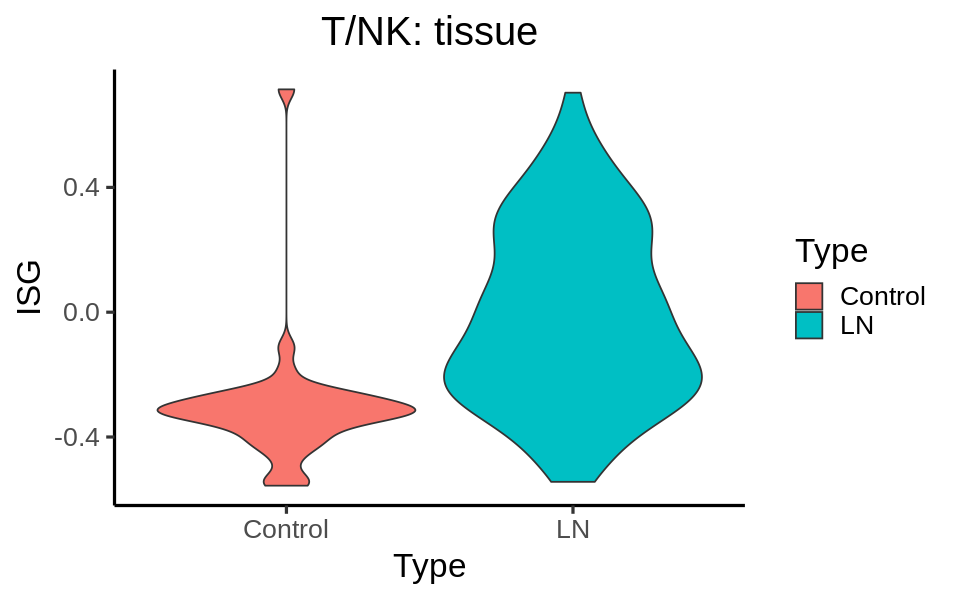

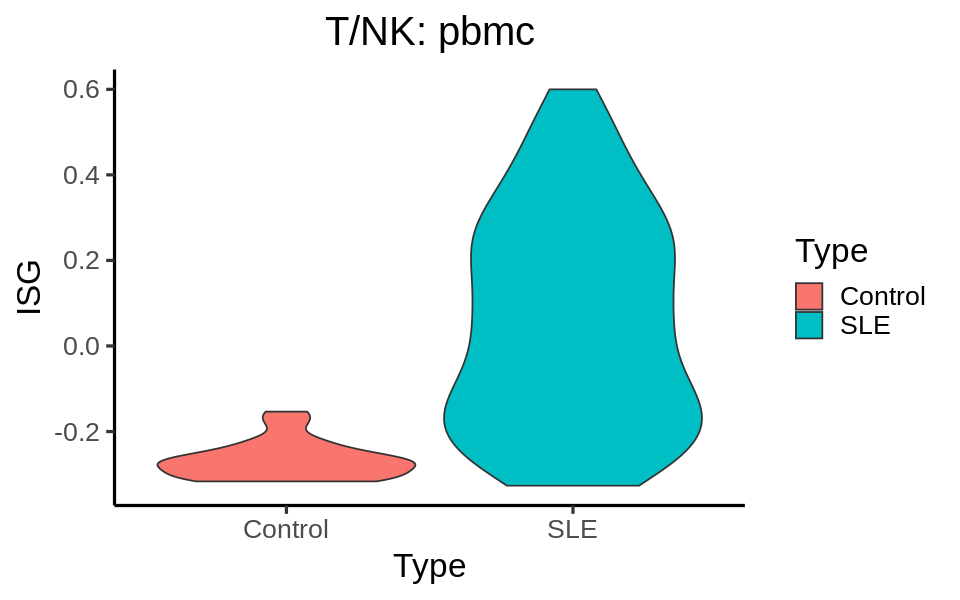

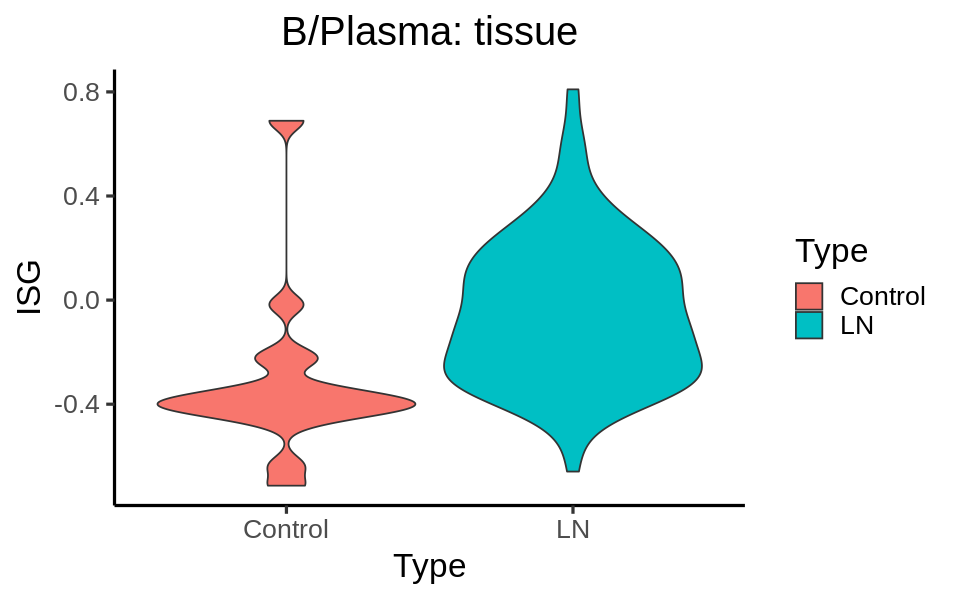

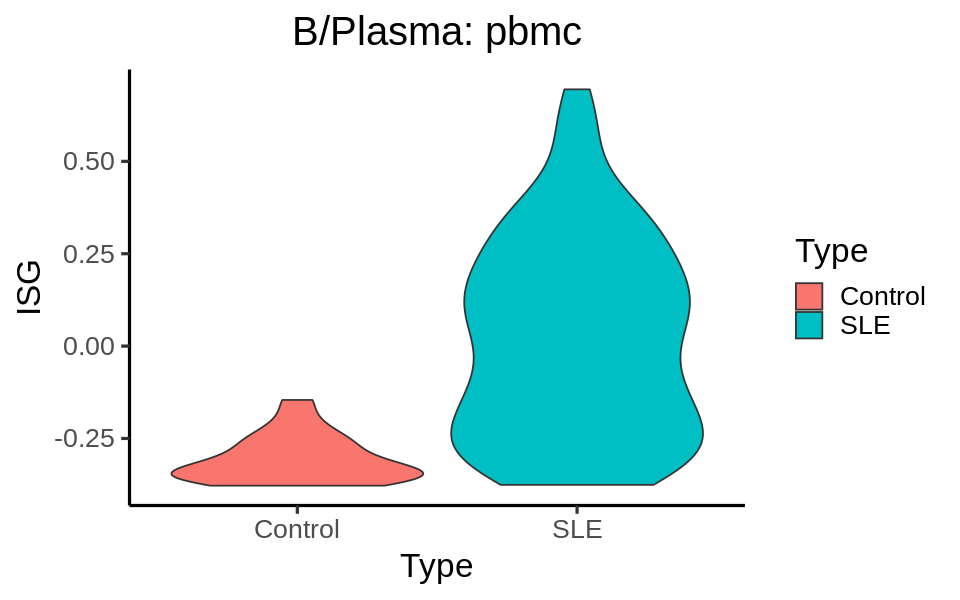

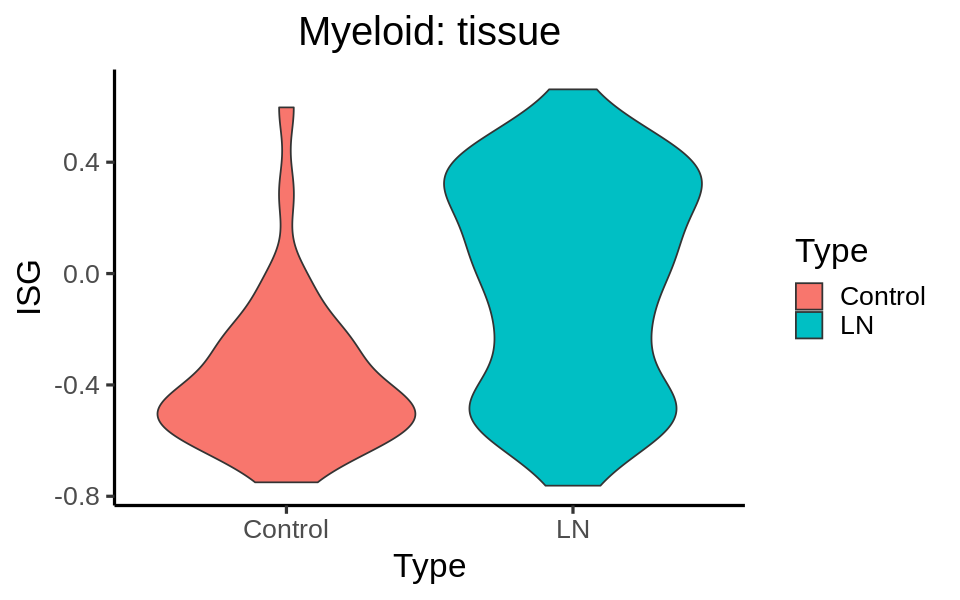

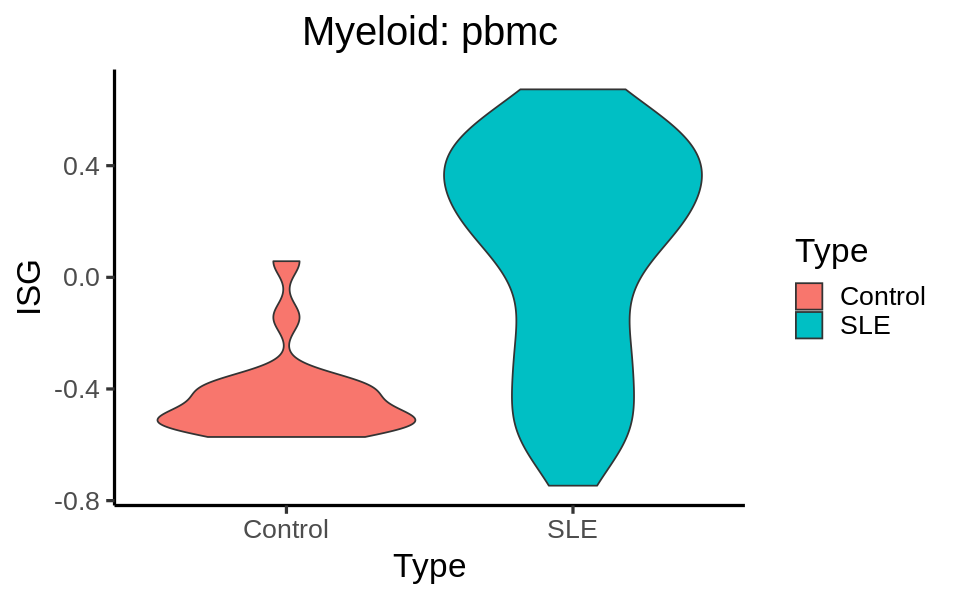

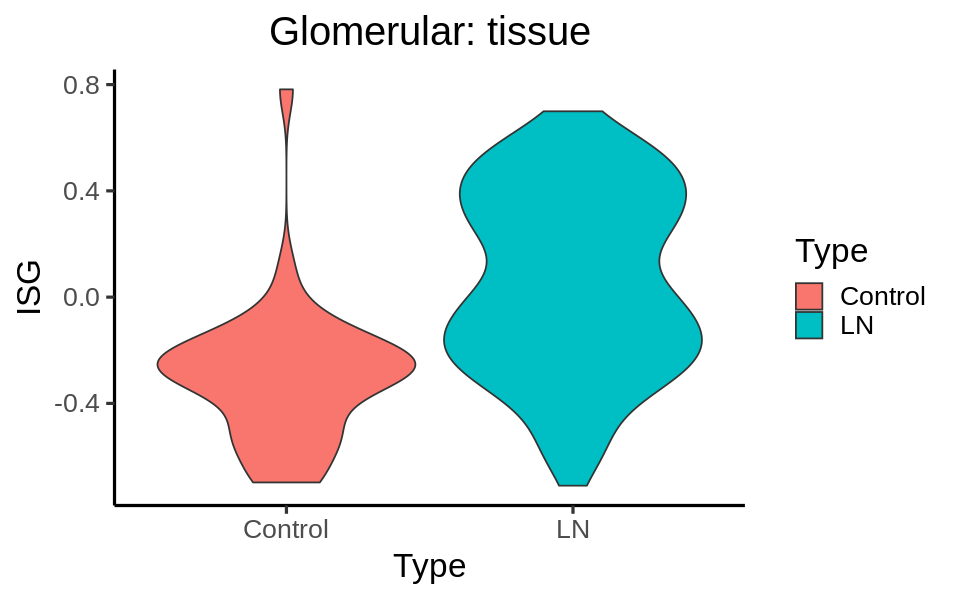

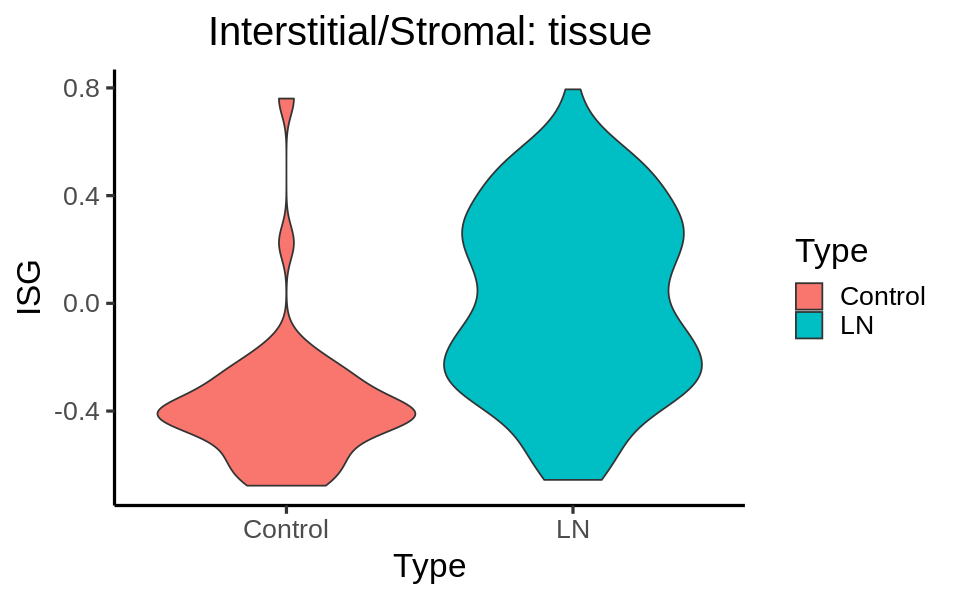

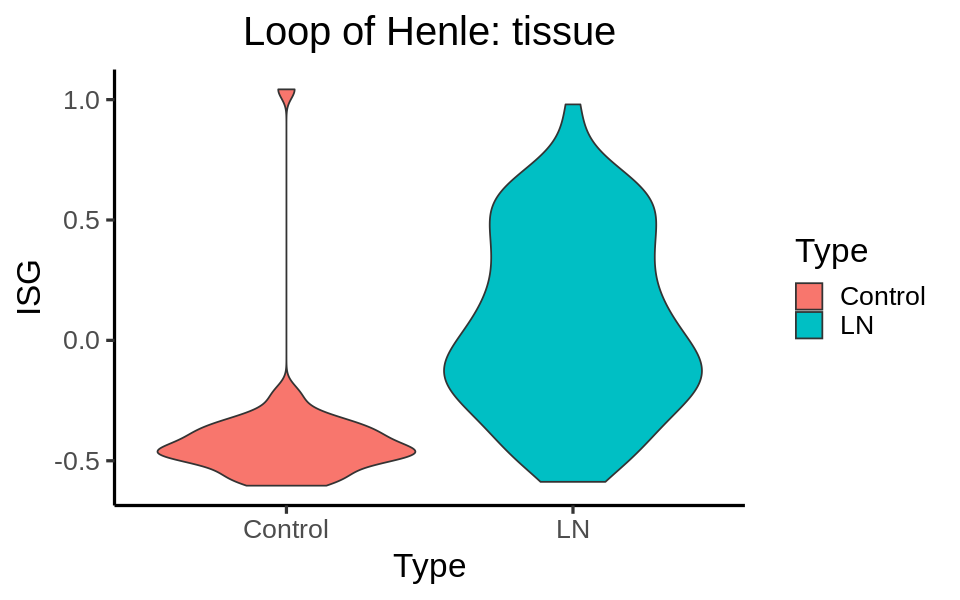

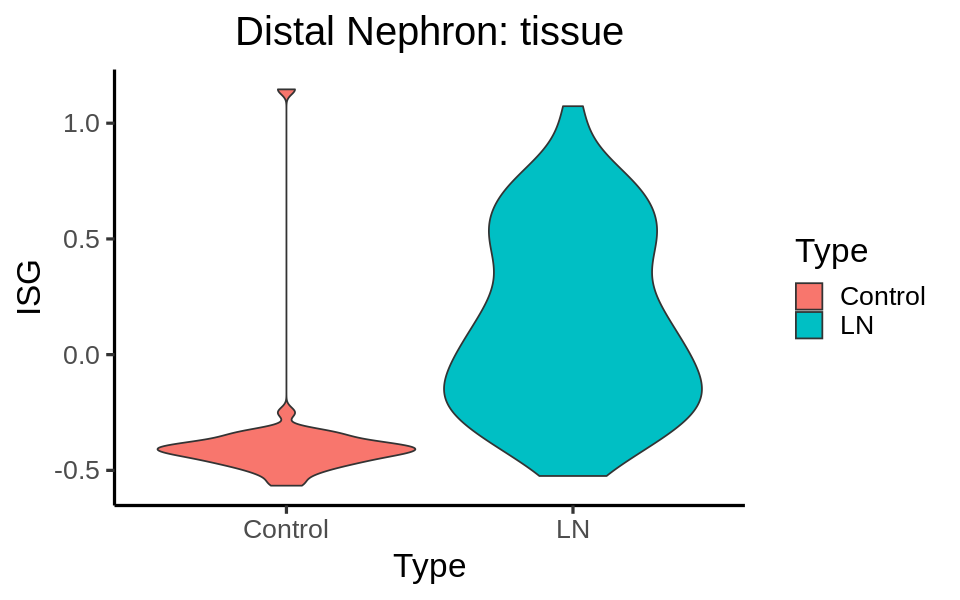

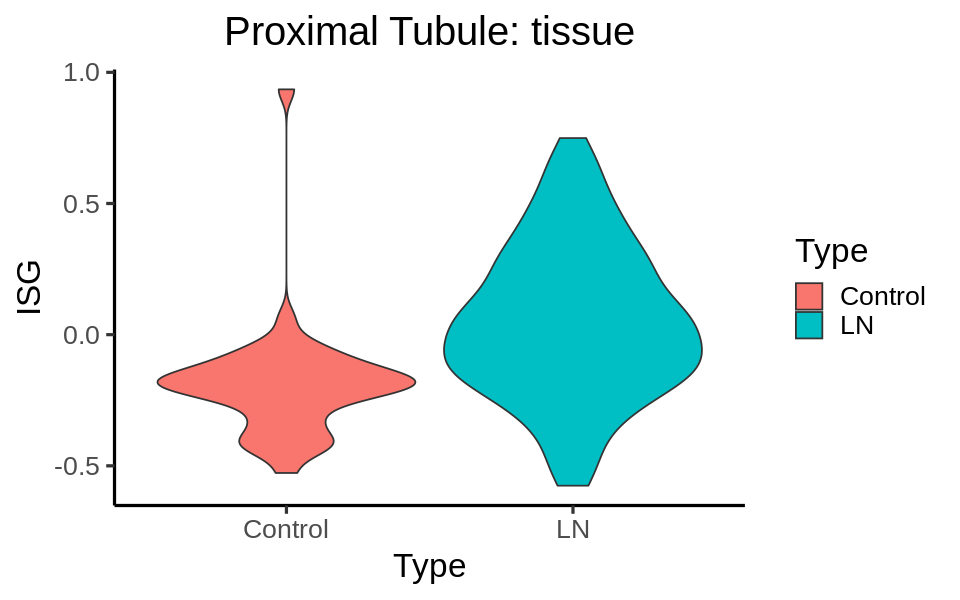

In [153]:
for (ctype in celltypes){
    if (ctype %in% immune_ctypes){
        tissue_list = c('tissue', 'pbmc')
    } else {
        tissue_list = c('tissue')
    }

    for (tissue in tissue_list){
        qcd_meta_out = meta_all[[ctype]][[tissue]]
        if (tissue == 'pbmc'){
            qcd_meta_out = qcd_meta_out %>% mutate(sample = individual)
        }
        sample_meta = qcd_meta_out %>% group_by(sample) %>% summarise(ISG = mean(ISG))
        sample_meta = merge(qcd_meta_out[!duplicated(qcd_meta_out$sample), ] %>% dplyr::select(-ISG), 
                            sample_meta, by = 'sample') %>% as.data.frame


        fig.size(5, 8)
        p = ggplot(sample_meta) +
            geom_violin(aes(x = Type, y = ISG, fill = Type), scale = 'width')+
            ggtitle(paste0(ctype, ': ', tissue))+
            theme_classic(base_size = 20)+
            theme(plot.title = element_text(hjust =0.5))
        print(p)
    }
}

### Hallmark genes

In [6]:
library(msigdbr)
library(fgsea)

In [7]:
category = 'H'
hsig_df = msigdbr(species = "human", category = category)

In [9]:
pathways = split(x = hsig_df$gene_symbol, f = hsig_df$gs_name)

In [12]:
isg_genes = c(pathways[['HALLMARK_INTERFERON_GAMMA_RESPONSE']],
             pathways[['HALLMARK_INTERFERON_ALPHA_RESPONSE']]) %>% unique %>% sort

In [14]:
isg_genes %>% length
isg_genes

[1] 224

[1] "ADAR"     "APOL6"    "ARID5B"   "ARL4A"    "AUTS2"    "B2M"     
  [7] "BANK1"    "BATF2"    "BPGM"     "BST2"     "BTG1"     "C1R"     
 [13] "C1S"      "CASP1"    "CASP3"    "CASP4"    "CASP7"    "CASP8"   
 [19] "CCL2"     "CCL5"     "CCL7"     "CCRL2"    "CD274"    "CD38"    
 [25] "CD40"     "CD47"     "CD69"     "CD74"     "CD86"     "CDKN1A"  
 [31] "CFB"      "CFH"      "CIITA"    "CMKLR1"   "CMPK2"    "CMTR1"   
 [37] "CNP"      "CSF1"     "CSF2RB"   "CXCL10"   "CXCL11"   "CXCL9"   
 [43] "DDX58"    "DDX60"    "DHX58"    "EIF2AK2"  "EIF4E3"   "ELF1"    
 [49] "EPSTI1"   "FAS"      "FCGR1A"   "FGL2"     "FPR1"     "GBP2"    
 [55] "GBP4"     "GBP6"     "GCH1"     "GMPR"     "GPR18"    "GZMA"    
 [61] "HELZ2"    "HERC6"    "HIF1A"    "HLA-A"    "HLA-B"    "HLA-C"   
 [67] "HLA-DMA"  "HLA-DQA1" "HLA-DRB1" "HLA-G"    "ICAM1"    "IDO1"    
 [73] "IFI27"    "IFI30"    "IFI35"    "IFI44"    "IFI44L"   "IFIH1"   
 [79] "IFIT1"    "IFIT2"    "IFIT3"    "IFITM1"   "IFITM2"   "IFITM3"  
 [85] "IFNAR2"   "IL10RA"   "IL15"     "IL15RA"   "IL18BP"   "IL2RB"   
 [91] "IL4R"     "IL6"      "IL7"      "IRF1"     "IRF2"     "IRF4"    
 [97] "IRF5"     "IRF7"     "IRF8"     "IRF9"     "ISG15"    "ISG20"   
[103] "ISOC1"    "ITGB7"    "JAK2"     "KLRK1"    "LAMP3"    "LAP3"    
[109] "LATS2"    "LCP2"     "LGALS3BP" "LPAR6"    "LY6E"     "LYSMD2"  
[115] "MARCHF1"  "METTL7B"  "MOV10"    "MT2A"     "MTHFD2"   "MVB12A"  
[121] "MVP"      "MX1"      "MX2"      "MYD88"    "NAMPT"    "NCOA3"   
[127] "NCOA7"    "NFKB1"    "NFKBIA"   "NLRC5"    "NMI"      "NOD1"    
[133] "NUB1"     "NUP93"    "OAS1"     "OAS2"     "OAS3"     "OASL"    
[139] "OGFR"     "P2RY14"   "PARP12"   "PARP14"   "PARP9"    "PDE4B"   
[145] "PELI1"    "PFKP"     "PIM1"     "PLA2G4A"  "PLSCR1"   "PML"     
[151] "PNP"      "PNPT1"    "PROCR"    "PSMA2"    "PSMA3"    "PSMB10"  
[157] "PSMB2"    "PSMB8"    "PSMB9"    "PSME1"    "PSME2"    "PTGS2"   
[163] "PTPN1"    "PTPN2"    "PTPN6"    "RAPGEF6"  "RBCK1"    "RIPK1"   
[169] "RIPK2"    "RNF213"   "RNF31"    "RSAD2"    "RTP4"     "SAMD9"   
[175] "SAMD9L"   "SAMHD1"   "SECTM1"   "SELL"     "SELP"     "SERPING1"
[181] "SLAMF7"   "SLC25A28" "SOCS1"    "SOCS3"    "SOD2"     "SP110"   
[187] "SPPL2A"   "SRI"      "SSPN"     "ST3GAL5"  "ST8SIA4"  "STAT1"   
[193] "STAT2"    "STAT3"    "STAT4"    "TAP1"     "TAPBP"    "TDRD7"   
[199] "TENT5A"   "TMEM140"  "TNFAIP2"  "TNFAIP3"  "TNFAIP6"  "TNFSF10" 
[205] "TOR1B"    "TRAFD1"   "TRIM14"   "TRIM21"   "TRIM25"   "TRIM26"  
[211] "TRIM5"    "TXNIP"    "UBA7"     "UBE2L6"   "UPP1"     "USP18"   
[217] "VAMP5"    "VAMP8"    "VCAM1"    "WARS1"    "XAF1"     "XCL1"    
[223] "ZBP1"     "ZNFX1"

In [15]:
for (ctype in celltypes){
    print(ctype)
    qcd_meta = readRDS(ctype_list[[ctype]][1])
    if (ctype %in% immune_ctypes){
        qcd_raw = readRDS(ctype_list[[ctype]][2])
        qcd_raw = qcd_raw[, qcd_meta$cell]
        
        qcd_pbmc = readRDS(ctype_list[[ctype]][5])
        qcd_raw_pbmc = qcd_pbmc@assays$RNA@counts
        qcd_meta_pbmc = readRDS(ctype_list[[ctype]][6])
        qcd_raw_pbmc = qcd_raw_pbmc[, qcd_meta_pbmc$Cell]
        tissue_list = c('tissue', 'pbmc')
    } else {
        qcd_raw = qcd_raw_tissue[, qcd_meta$cell]
        tissue_list = c('tissue')
    }
    
    for (tissue in tissue_list){
        if (tissue == 'pbmc'){
            raw = qcd_raw_pbmc
        } else {raw = qcd_raw}
        
        isg_genes_overlap = intersect(isg_genes, rownames(raw))
        qcd_norm = raw %>% normalizeData(scaling_factor=1e6, method='log')
        gene_ind = (rowSums(raw>1)>1) # Filter very lowly expressed genes
        gene_ind[isg_genes_overlap] = TRUE
        
        tryCatch({
            qcd_scaled = qcd_norm[gene_ind, ] %>% scaleData() # Faster but some memory constraints
            }, error = function(e) {
            message("scaleData() failed: using Seurat fallback.")
            qcd_scaled = qcd_norm[gene_ind, ] %>% ScaleData # Confirmed seurat identical to singlecellmethods
        })
            
        # Add both sparse and scaled counts to seurat object
        dummy_counts <- Matrix(0, nrow = nrow(qcd_scaled), ncol = ncol(qcd_scaled), sparse = TRUE)
        rownames(dummy_counts) <- rownames(qcd_scaled)
        colnames(dummy_counts) <- colnames(qcd_scaled)
        seu_sparse = CreateSeuratObject(counts = dummy_counts)

        scaled_assay = CreateAssayObject(counts = dummy_counts)
        scaled_assay@data = qcd_scaled  
        seu_sparse[["data"]] = scaled_assay
        DefaultAssay(seu_sparse) = "data"

        # Run scoring
        scores = AddModuleScore(
          object = seu_sparse[,],
          features = list(isg_genes_overlap),
          ctrl = 50)
        scores = scores@meta.data['Cluster1'] %>% rename(ISG = Cluster1)
        
        out_fn = paste0(outdir, ctype_list[[ctype]][3], '_', tissue, '_ISGscoreseurat_hallmark.rds')
        saveRDS(scores, out_fn)
        
    }
    rm(qcd_norm, qcd_scaled, seu_sparse)
    gc()
    flush.console()
}

[1] "T/NK"


scaleData() failed: using Seurat fallback.



ERROR: Error in .subscript.2ary(x, i, , drop = TRUE): logical subscript too long


In [45]:
        isg_genes_overlap = intersect(isg_genes, rownames(raw))
        qcd_norm = raw %>% normalizeData(scaling_factor=1e6, method='log')
        gene_ind = (rowSums(raw>1)>1) # Filter very lowly expressed genes
        gene_ind[isg_genes_overlap] = TRUE
        
        tryCatch({
            qcd_scaled = qcd_norm[gene_ind, ] %>% scaleData() # Faster but some memory constraints
            }, error = function(e) {
            message("scaleData() failed: using Seurat fallback.")
            qcd_scaled = qcd_norm[gene_ind, ] %>% ScaleData # Confirmed seurat identical to singlecellmethods
        })
            
        # Add both sparse and scaled counts to seurat object
        dummy_counts <- Matrix(0, nrow = nrow(qcd_scaled), ncol = ncol(qcd_scaled), sparse = TRUE)
        rownames(dummy_counts) <- rownames(qcd_scaled)
        colnames(dummy_counts) <- colnames(qcd_scaled)
        seu_sparse = CreateSeuratObject(counts = dummy_counts)

        scaled_assay = CreateAssayObject(counts = dummy_counts)
        scaled_assay@data = qcd_scaled  
        seu_sparse[["data"]] = scaled_assay
        DefaultAssay(seu_sparse) = "data"

        # Run scoring
        scores = AddModuleScore(
          object = seu_sparse[,],
          features = list(isg_genes_overlap),
          ctrl = 50)
        scores = scores@meta.data['Cluster1'] %>% rename(ISG = Cluster1)
        
        out_fn = paste0(outdir, ctype_list[[ctype]][3], '_', tissue, '_ISGscoreseurat_hallmark.rds')
        saveRDS(scores, out_fn)


ERROR: Error in sample.int(length(x), size, replace, prob): invalid first argument


In [48]:
AddModuleScore(seu_sparse, features = list(isg_genes_overlap))

ERROR: Error in sample.int(length(x), size, replace, prob): invalid first argument


In [53]:
intersect(isg_genes_overlap, rownames(seu_sparse)) %>% length
isg_genes_overlap %>% length

[1] 222

[1] 222

In [46]:
seu_sparse

An object of class Seurat 
33526 features across 37510 samples within 2 assays 
Active assay: data (16763 features, 0 variable features)
 2 layers present: counts, data
 1 other assay present: RNA

## Per-sample averaging genes

In [56]:
pseudobulk <- function(counts, groups) {
    colnames(counts) = groups
    
    # Convert group labels into a sparse indicator matrix
    group_levels <- unique(groups)
    group_matrix <- sparseMatrix(
      i = match(groups, group_levels), 
      j = seq_len(length(groups)), 
    )

    # Perform sparse matrix multiplication to sum within groups
    pseudo_raw <- group_matrix %*% (counts %>% t)

    # Assign row names to match groups
    rownames(pseudo_raw) <- group_levels

    pseudo_raw = pseudo_raw %>% t
    
    return(pseudo_raw)
    
}

### Arnon genes

In [54]:
isg_genes = readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/pseudobulk_de/isg_genes.rds')

In [55]:
isg_genes

[1] "IFI44L"   "IFITM3"   "BST2"     "LY6E"     "IFIT1"    "MX1"     
 [7] "STAT1"    "XAF1"     "RNF213"   "TNFSF10"  "IFIT3"    "IFI44"   
[13] "PARP14"   "OAS1"     "EIF2AK2"  "PSMB9"    "TYMP"     "IRF9"    
[19] "SERPING1" "GADD45B"

In [79]:
for (ctype in celltypes[2:length(celltypes)]){
    print(ctype)
    qcd_meta = readRDS(ctype_list[[ctype]][1])

    if (ctype %in% immune_ctypes){
        qcd_raw = readRDS(ctype_list[[ctype]][2])
        qcd_raw = qcd_raw[, qcd_meta$cell]

        qcd_pbmc = readRDS(ctype_list[[ctype]][5])
        qcd_raw_pbmc = qcd_pbmc@assays$RNA@counts
        qcd_meta_pbmc = readRDS(ctype_list[[ctype]][6])
        qcd_raw_pbmc = qcd_raw_pbmc[, qcd_meta_pbmc$Cell]
        tissue_list = c('tissue', 'pbmc')
    } else {
        qcd_raw = qcd_raw_tissue[, qcd_meta$cell]
        tissue_list = c('tissue')
    }

    for (tissue in tissue_list){
        if (tissue == 'pbmc'){
            pseudo_raw = pseudobulk(qcd_raw_pbmc, qcd_meta_pbmc$individual)
        } else {
        pseudo_raw = pseudobulk(qcd_raw, qcd_meta$sample)}
    
        # log TPM norm         
        a = 1e6
        pseudo_tpm = t(t(pseudo_raw) / colSums(pseudo_raw)) * a
        pseudo_log = log10(pseudo_tpm + 1)
        pseudo_scaled = pseudo_log[isg_genes, ] %>% scaleData()

        scores = pseudo_scaled %>% colMeans
        out_fn = paste0(outdir, ctype_list[[ctype]][3], '_', tissue, '_ISGscore_AvgExprSample.rds')
        saveRDS(scores, out_fn)
    }
}


[1] "B/Plasma"
[1] "Myeloid"
[1] "Glomerular"
[1] "Interstitial/Stromal"
[1] "Loop of Henle"
[1] "Distal Nephron"
[1] "Proximal Tubule"


In [91]:
meta_all = list()

for (ctype in celltypes){
    meta_all[[ctype]] = list()
    
    qcd_meta = readRDS(ctype_list[[ctype]][1])
    sample_meta = qcd_meta[!duplicated(qcd_meta$sample), ]
    if (ctype %in% immune_ctypes){
        qcd_meta_pbmc = readRDS(ctype_list[[ctype]][6])
        sample_meta_pbmc = qcd_meta_pbmc[!duplicated(qcd_meta_pbmc$individual), ] %>% rename(sample = individual)
        tissue_list = c('tissue', 'pbmc')
    } else {
        tissue_list = c('tissue')
    }
    for (tissue in tissue_list){
        print(paste0(ctype, ': ', tissue))
        isg_fn = paste0('../../misc/', ctype_list[[ctype]][3], '_', tissue, '_ISGscore_AvgExprSample.rds')
        print(isg_fn)
        isg_scores = readRDS(isg_fn) %>% as.data.frame
        colnames(isg_scores) = c('ISG')
        
        if (tissue == 'pbmc'){
        qcd_meta_out = merge(sample_meta_pbmc, isg_scores,  by.x = 'sample', by.y = 'row.names')                    
        } else {
        qcd_meta_out = merge(sample_meta, isg_scores, by.x = 'sample', by.y = 'row.names')                    
        }
        print(isg_scores %>% dim)
        meta_all[[ctype]][[tissue]] = qcd_meta_out

    }

}

[1] "T/NK: tissue"
[1] "../../misc/tnk_tissue_ISGscore_AvgExprSample.rds"
[1] 227   1
[1] "T/NK: pbmc"
[1] "../../misc/tnk_pbmc_ISGscore_AvgExprSample.rds"
[1] 138   1
[1] "B/Plasma: tissue"
[1] "../../misc/bp_tissue_ISGscore_AvgExprSample.rds"
[1] 204   1
[1] "B/Plasma: pbmc"
[1] "../../misc/bp_pbmc_ISGscore_AvgExprSample.rds"
[1] 132   1
[1] "Myeloid: tissue"
[1] "../../misc/myeloid_tissue_ISGscore_AvgExprSample.rds"
[1] 229   1
[1] "Myeloid: pbmc"
[1] "../../misc/myeloid_pbmc_ISGscore_AvgExprSample.rds"
[1] 136   1
[1] "Glomerular: tissue"
[1] "../../misc/glom_tissue_ISGscore_AvgExprSample.rds"
[1] 233   1
[1] "Interstitial/Stromal: tissue"
[1] "../../misc/intl_tissue_ISGscore_AvgExprSample.rds"
[1] 234   1
[1] "Loop of Henle: tissue"
[1] "../../misc/loh_tissue_ISGscore_AvgExprSample.rds"
[1] 236   1
[1] "Distal Nephron: tissue"
[1] "../../misc/dn_tissue_ISGscore_AvgExprSample.rds"
[1] 236   1
[1] "Proximal Tubule: tissue"
[1] "../../misc/pt_tissue_ISGscore_AvgExprSample.rds"
[1] 23

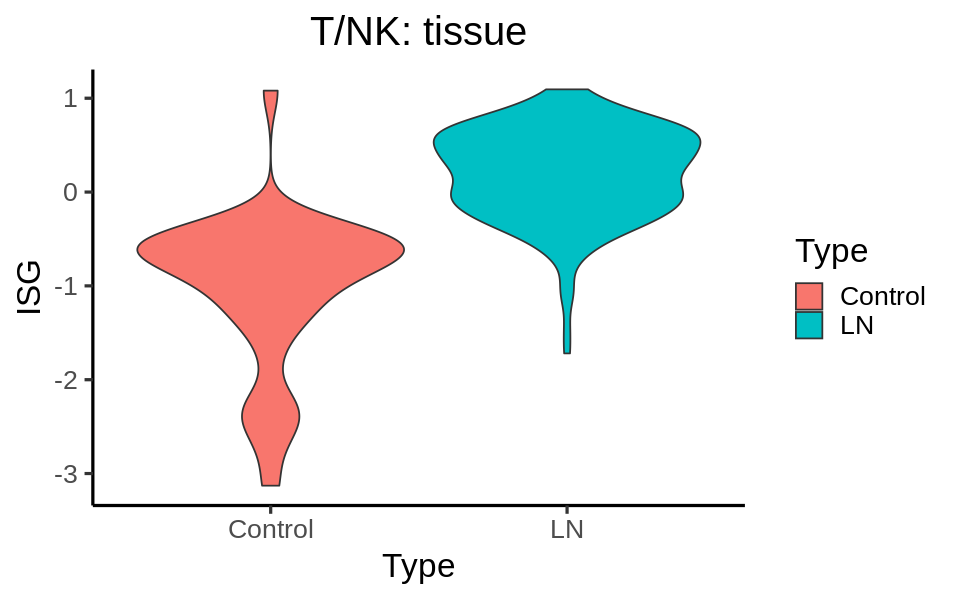

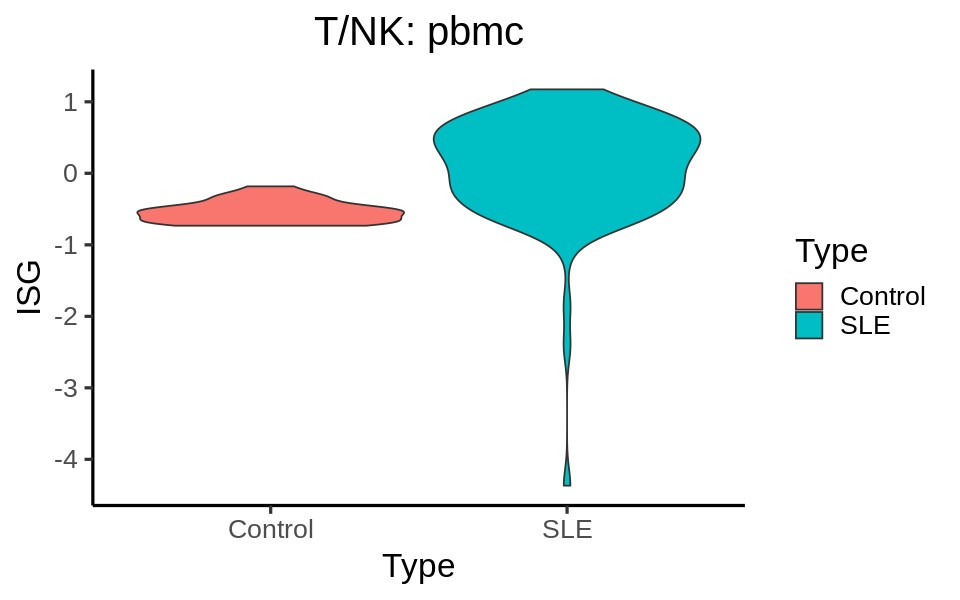

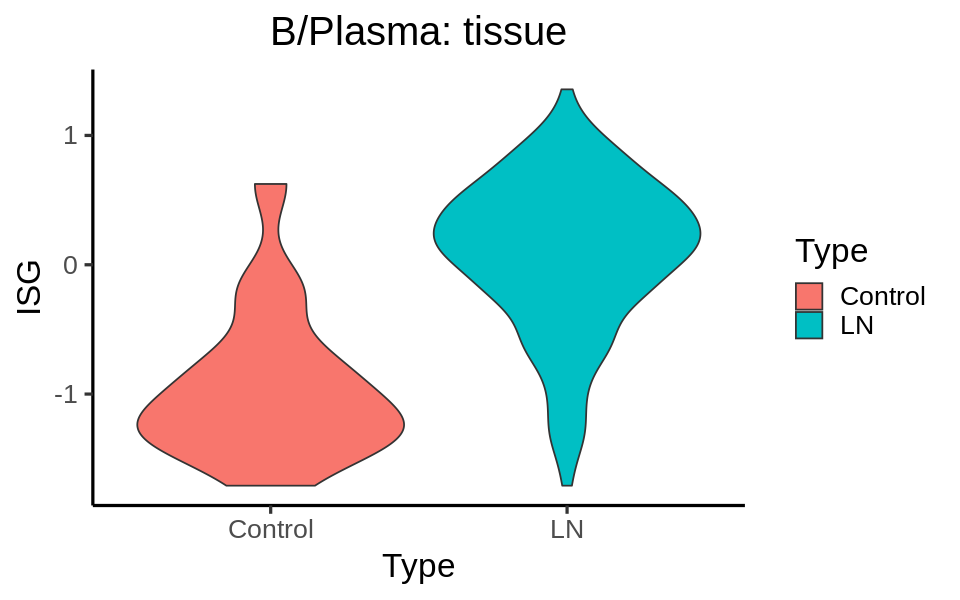

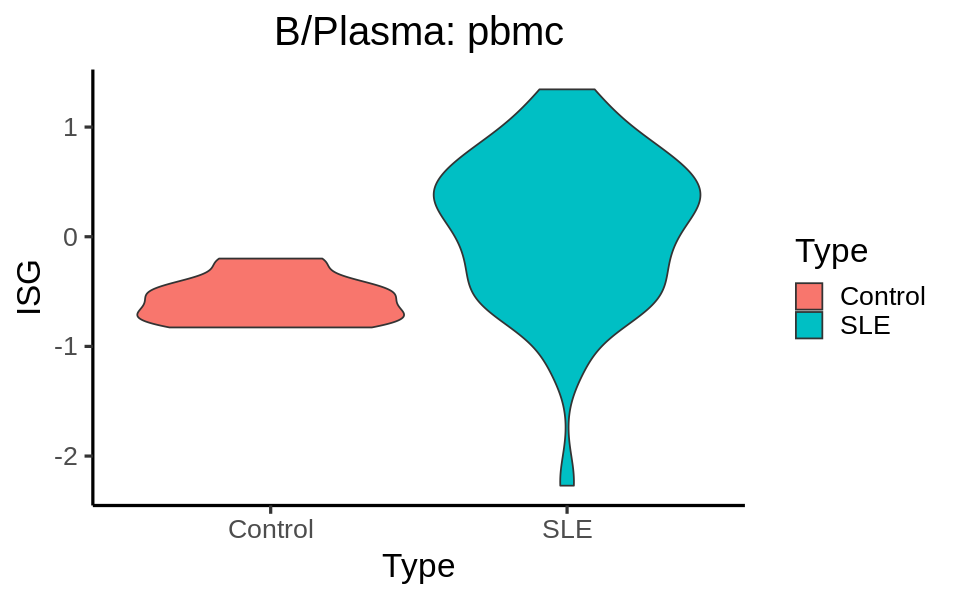

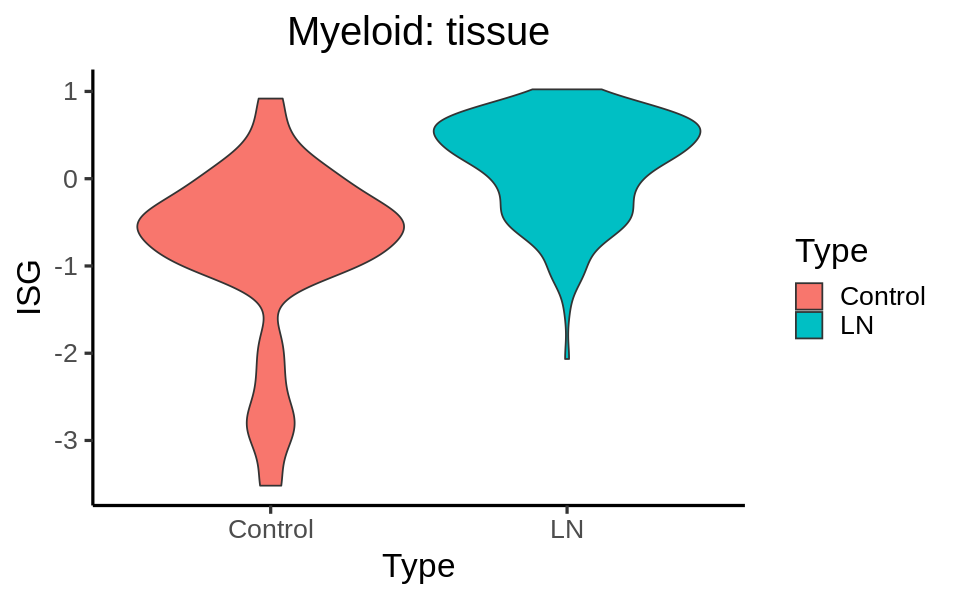

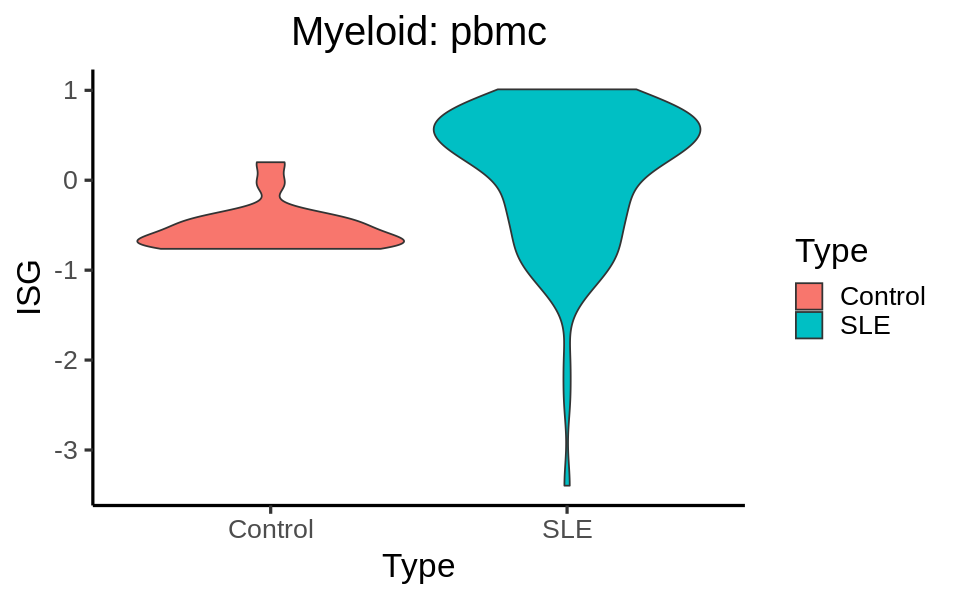

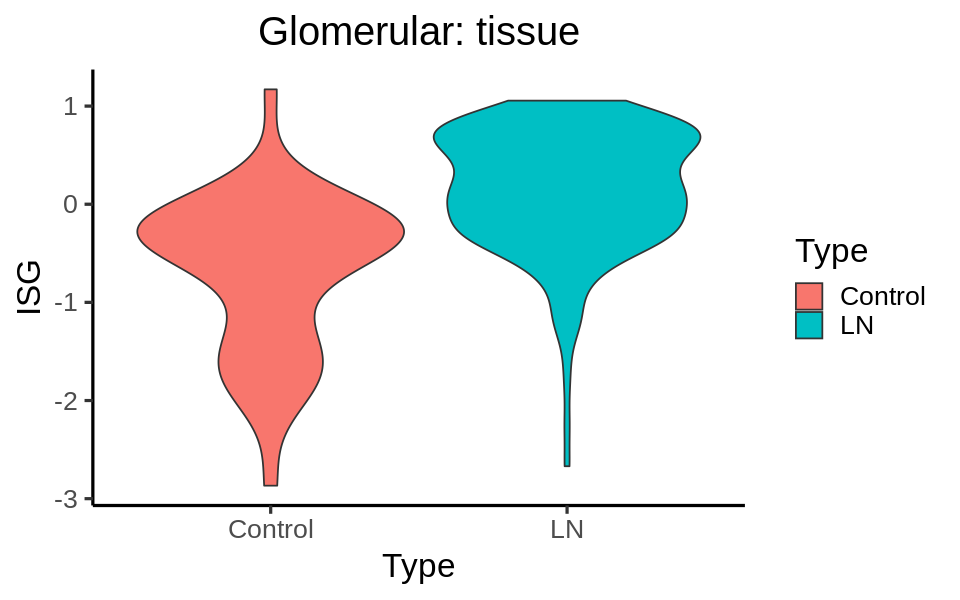

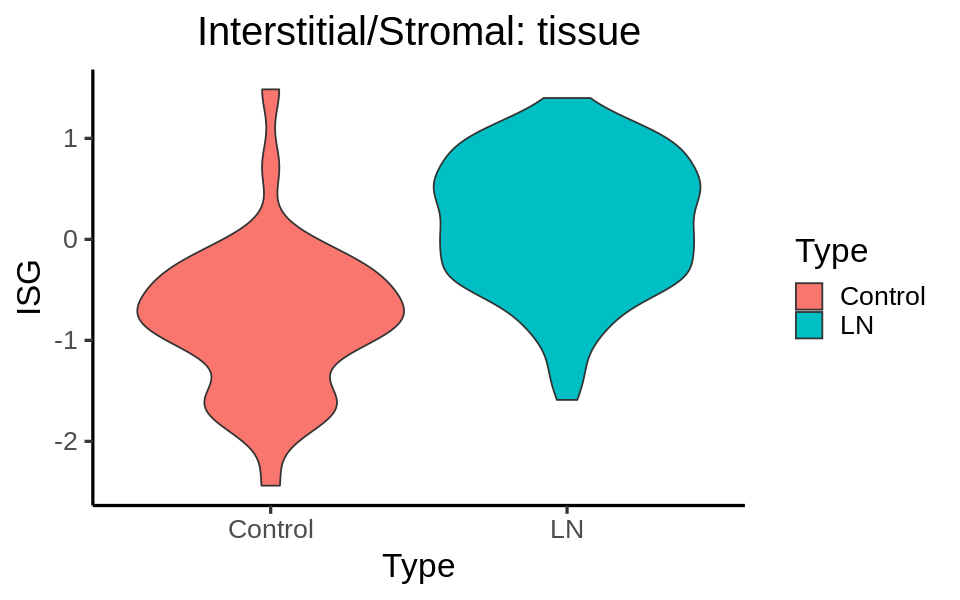

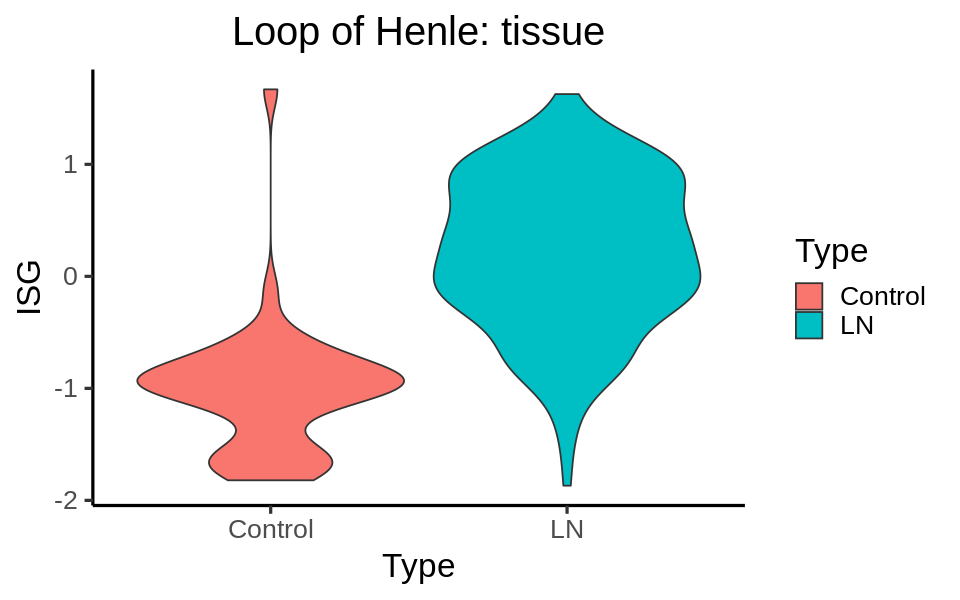

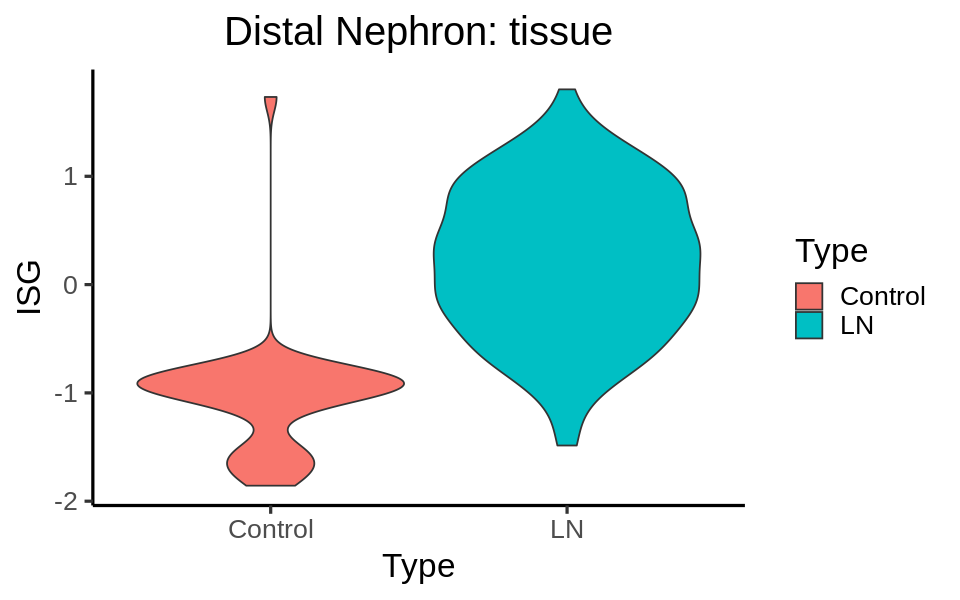

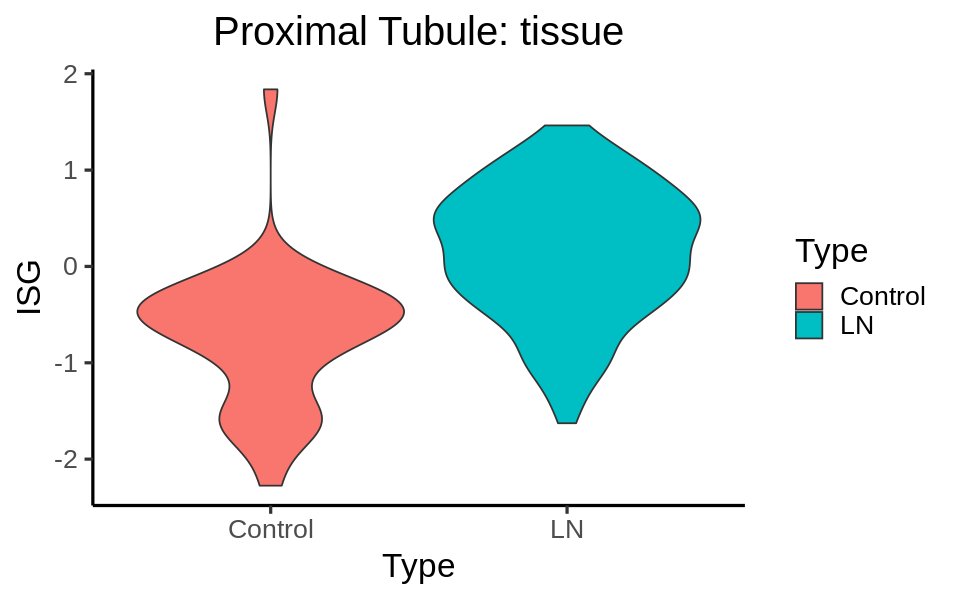

In [94]:
for (ctype in celltypes){
    if (ctype %in% immune_ctypes){
        tissue_list = c('tissue', 'pbmc')
    } else {
        tissue_list = c('tissue')
    }

    for (tissue in tissue_list){
        qcd_meta_out = meta_all[[ctype]][[tissue]]
        if (tissue == 'pbmc'){
            qcd_meta_out = qcd_meta_out #%>% mutate(sample = individual)
        }
        sample_meta = qcd_meta_out

        fig.size(5, 8)
        p = ggplot(sample_meta) +
            geom_violin(aes(x = Type, y = ISG, fill = Type), scale = 'width')+
            ggtitle(paste0(ctype, ': ', tissue))+
            theme_classic(base_size = 20)+
            theme(plot.title = element_text(hjust =0.5))
        print(p)
    }
}

### Hallmark genes

In [95]:
library(msigdbr)
library(fgsea)

In [96]:
category = 'H'
hsig_df = msigdbr(species = "human", category = category)

In [97]:
pathways = split(x = hsig_df$gene_symbol, f = hsig_df$gs_name)

In [98]:
isg_genes = c(pathways[['HALLMARK_INTERFERON_GAMMA_RESPONSE']],
             pathways[['HALLMARK_INTERFERON_ALPHA_RESPONSE']]) %>% unique %>% sort

In [99]:
isg_genes %>% length
isg_genes

[1] 224

[1] "ADAR"     "APOL6"    "ARID5B"   "ARL4A"    "AUTS2"    "B2M"     
  [7] "BANK1"    "BATF2"    "BPGM"     "BST2"     "BTG1"     "C1R"     
 [13] "C1S"      "CASP1"    "CASP3"    "CASP4"    "CASP7"    "CASP8"   
 [19] "CCL2"     "CCL5"     "CCL7"     "CCRL2"    "CD274"    "CD38"    
 [25] "CD40"     "CD47"     "CD69"     "CD74"     "CD86"     "CDKN1A"  
 [31] "CFB"      "CFH"      "CIITA"    "CMKLR1"   "CMPK2"    "CMTR1"   
 [37] "CNP"      "CSF1"     "CSF2RB"   "CXCL10"   "CXCL11"   "CXCL9"   
 [43] "DDX58"    "DDX60"    "DHX58"    "EIF2AK2"  "EIF4E3"   "ELF1"    
 [49] "EPSTI1"   "FAS"      "FCGR1A"   "FGL2"     "FPR1"     "GBP2"    
 [55] "GBP4"     "GBP6"     "GCH1"     "GMPR"     "GPR18"    "GZMA"    
 [61] "HELZ2"    "HERC6"    "HIF1A"    "HLA-A"    "HLA-B"    "HLA-C"   
 [67] "HLA-DMA"  "HLA-DQA1" "HLA-DRB1" "HLA-G"    "ICAM1"    "IDO1"    
 [73] "IFI27"    "IFI30"    "IFI35"    "IFI44"    "IFI44L"   "IFIH1"   
 [79] "IFIT1"    "IFIT2"    "IFIT3"    "IFITM1"   "IFITM2"   "IFITM3"  
 [85] "IFNAR2"   "IL10RA"   "IL15"     "IL15RA"   "IL18BP"   "IL2RB"   
 [91] "IL4R"     "IL6"      "IL7"      "IRF1"     "IRF2"     "IRF4"    
 [97] "IRF5"     "IRF7"     "IRF8"     "IRF9"     "ISG15"    "ISG20"   
[103] "ISOC1"    "ITGB7"    "JAK2"     "KLRK1"    "LAMP3"    "LAP3"    
[109] "LATS2"    "LCP2"     "LGALS3BP" "LPAR6"    "LY6E"     "LYSMD2"  
[115] "MARCHF1"  "METTL7B"  "MOV10"    "MT2A"     "MTHFD2"   "MVB12A"  
[121] "MVP"      "MX1"      "MX2"      "MYD88"    "NAMPT"    "NCOA3"   
[127] "NCOA7"    "NFKB1"    "NFKBIA"   "NLRC5"    "NMI"      "NOD1"    
[133] "NUB1"     "NUP93"    "OAS1"     "OAS2"     "OAS3"     "OASL"    
[139] "OGFR"     "P2RY14"   "PARP12"   "PARP14"   "PARP9"    "PDE4B"   
[145] "PELI1"    "PFKP"     "PIM1"     "PLA2G4A"  "PLSCR1"   "PML"     
[151] "PNP"      "PNPT1"    "PROCR"    "PSMA2"    "PSMA3"    "PSMB10"  
[157] "PSMB2"    "PSMB8"    "PSMB9"    "PSME1"    "PSME2"    "PTGS2"   
[163] "PTPN1"    "PTPN2"    "PTPN6"    "RAPGEF6"  "RBCK1"    "RIPK1"   
[169] "RIPK2"    "RNF213"   "RNF31"    "RSAD2"    "RTP4"     "SAMD9"   
[175] "SAMD9L"   "SAMHD1"   "SECTM1"   "SELL"     "SELP"     "SERPING1"
[181] "SLAMF7"   "SLC25A28" "SOCS1"    "SOCS3"    "SOD2"     "SP110"   
[187] "SPPL2A"   "SRI"      "SSPN"     "ST3GAL5"  "ST8SIA4"  "STAT1"   
[193] "STAT2"    "STAT3"    "STAT4"    "TAP1"     "TAPBP"    "TDRD7"   
[199] "TENT5A"   "TMEM140"  "TNFAIP2"  "TNFAIP3"  "TNFAIP6"  "TNFSF10" 
[205] "TOR1B"    "TRAFD1"   "TRIM14"   "TRIM21"   "TRIM25"   "TRIM26"  
[211] "TRIM5"    "TXNIP"    "UBA7"     "UBE2L6"   "UPP1"     "USP18"   
[217] "VAMP5"    "VAMP8"    "VCAM1"    "WARS1"    "XAF1"     "XCL1"    
[223] "ZBP1"     "ZNFX1"

In [100]:
isg_genes_overlap = intersect(isg_genes, rownames(pseudo_raw))

In [101]:
isg_genes_overlap

[1] "ADAR"     "APOL6"    "ARID5B"   "ARL4A"    "AUTS2"    "B2M"     
  [7] "BANK1"    "BATF2"    "BPGM"     "BST2"     "BTG1"     "C1R"     
 [13] "C1S"      "CASP1"    "CASP3"    "CASP4"    "CASP7"    "CASP8"   
 [19] "CCL2"     "CCL5"     "CCL7"     "CCRL2"    "CD274"    "CD38"    
 [25] "CD40"     "CD47"     "CD69"     "CD74"     "CD86"     "CDKN1A"  
 [31] "CFB"      "CFH"      "CIITA"    "CMKLR1"   "CMPK2"    "CMTR1"   
 [37] "CNP"      "CSF1"     "CSF2RB"   "CXCL10"   "CXCL11"   "CXCL9"   
 [43] "DDX58"    "DDX60"    "DHX58"    "EIF2AK2"  "EIF4E3"   "ELF1"    
 [49] "EPSTI1"   "FAS"      "FCGR1A"   "FGL2"     "FPR1"     "GBP2"    
 [55] "GBP4"     "GBP6"     "GCH1"     "GMPR"     "GPR18"    "GZMA"    
 [61] "HELZ2"    "HERC6"    "HIF1A"    "HLA-A"    "HLA-B"    "HLA-C"   
 [67] "HLA-DMA"  "HLA-DQA1" "HLA-DRB1" "HLA-G"    "ICAM1"    "IDO1"    
 [73] "IFI27"    "IFI30"    "IFI35"    "IFI44"    "IFI44L"   "IFIH1"   
 [79] "IFIT1"    "IFIT2"    "IFIT3"    "IFITM1"   "IFITM2"   "IFITM3"  
 [85] "IFNAR2"   "IL10RA"   "IL15"     "IL15RA"   "IL18BP"   "IL2RB"   
 [91] "IL4R"     "IL6"      "IL7"      "IRF1"     "IRF2"     "IRF4"    
 [97] "IRF5"     "IRF7"     "IRF8"     "IRF9"     "ISG15"    "ISG20"   
[103] "ISOC1"    "ITGB7"    "JAK2"     "KLRK1"    "LAMP3"    "LAP3"    
[109] "LATS2"    "LCP2"     "LGALS3BP" "LPAR6"    "LY6E"     "LYSMD2"  
[115] "METTL7B"  "MOV10"    "MT2A"     "MTHFD2"   "MVB12A"   "MVP"     
[121] "MX1"      "MX2"      "MYD88"    "NAMPT"    "NCOA3"    "NCOA7"   
[127] "NFKB1"    "NFKBIA"   "NLRC5"    "NMI"      "NOD1"     "NUB1"    
[133] "NUP93"    "OAS1"     "OAS2"     "OAS3"     "OASL"     "OGFR"    
[139] "P2RY14"   "PARP12"   "PARP14"   "PARP9"    "PDE4B"    "PELI1"   
[145] "PFKP"     "PIM1"     "PLA2G4A"  "PLSCR1"   "PML"      "PNP"     
[151] "PNPT1"    "PROCR"    "PSMA2"    "PSMA3"    "PSMB10"   "PSMB2"   
[157] "PSMB8"    "PSMB9"    "PSME1"    "PSME2"    "PTGS2"    "PTPN1"   
[163] "PTPN2"    "PTPN6"    "RAPGEF6"  "RBCK1"    "RIPK1"    "RIPK2"   
[169] "RNF213"   "RNF31"    "RSAD2"    "RTP4"     "SAMD9"    "SAMD9L"  
[175] "SAMHD1"   "SECTM1"   "SELL"     "SELP"     "SERPING1" "SLAMF7"  
[181] "SLC25A28" "SOCS1"    "SOCS3"    "SOD2"     "SP110"    "SPPL2A"  
[187] "SRI"      "SSPN"     "ST3GAL5"  "ST8SIA4"  "STAT1"    "STAT2"   
[193] "STAT3"    "STAT4"    "TAP1"     "TAPBP"    "TDRD7"    "TENT5A"  
[199] "TMEM140"  "TNFAIP2"  "TNFAIP3"  "TNFAIP6"  "TNFSF10"  "TOR1B"   
[205] "TRAFD1"   "TRIM14"   "TRIM21"   "TRIM25"   "TRIM26"   "TRIM5"   
[211] "TXNIP"    "UBA7"     "UBE2L6"   "UPP1"     "USP18"    "VAMP5"   
[217] "VAMP8"    "VCAM1"    "XAF1"     "XCL1"     "ZBP1"     "ZNFX1"

In [102]:
for (ctype in celltypes){
    print(ctype)
    qcd_meta = readRDS(ctype_list[[ctype]][1])

    if (ctype %in% immune_ctypes){
        qcd_raw = readRDS(ctype_list[[ctype]][2])
        qcd_raw = qcd_raw[, qcd_meta$cell]

        qcd_pbmc = readRDS(ctype_list[[ctype]][5])
        qcd_raw_pbmc = qcd_pbmc@assays$RNA@counts
        qcd_meta_pbmc = readRDS(ctype_list[[ctype]][6])
        qcd_raw_pbmc = qcd_raw_pbmc[, qcd_meta_pbmc$Cell]
        tissue_list = c('tissue', 'pbmc')
    } else {
        qcd_raw = qcd_raw_tissue[, qcd_meta$cell]
        tissue_list = c('tissue')
    }

    for (tissue in tissue_list){
        if (tissue == 'pbmc'){
            pseudo_raw = pseudobulk(qcd_raw_pbmc, qcd_meta_pbmc$individual)
        } else {
        pseudo_raw = pseudobulk(qcd_raw, qcd_meta$sample)}
        
        isg_genes_overlap = intersect(isg_genes, rownames(pseudo_raw))
    
        # log TPM norm         
        a = 1e6
        pseudo_tpm = t(t(pseudo_raw) / colSums(pseudo_raw)) * a
        pseudo_log = log10(pseudo_tpm + 1)
        pseudo_scaled = pseudo_log[isg_genes_overlap, ] %>% scaleData()

        scores = pseudo_scaled %>% colMeans(na.rm = TRUE)
        out_fn = paste0(outdir, ctype_list[[ctype]][3], '_', tissue, '_ISGscore_AvgExprSample_hallmark.rds')
        saveRDS(scores, out_fn)
    }
}


[1] "T/NK"
[1] "B/Plasma"
[1] "Myeloid"
[1] "Glomerular"
[1] "Interstitial/Stromal"
[1] "Loop of Henle"
[1] "Distal Nephron"
[1] "Proximal Tubule"


In [127]:
meta_all = list()

for (ctype in celltypes){
    meta_all[[ctype]] = list()
    
    qcd_meta = readRDS(ctype_list[[ctype]][1])
    sample_meta = qcd_meta[!duplicated(qcd_meta$sample), ]
    if (ctype %in% immune_ctypes){
        qcd_meta_pbmc = readRDS(ctype_list[[ctype]][6])
        sample_meta_pbmc = qcd_meta_pbmc[!duplicated(qcd_meta_pbmc$individual), ] %>% rename(sample = individual)
        tissue_list = c('tissue', 'pbmc')
    } else {
        tissue_list = c('tissue')
    }
    for (tissue in tissue_list){
        print(paste0(ctype, ': ', tissue))
        isg_fn = paste0('../../misc/', ctype_list[[ctype]][3], '_', tissue, '_ISGscore_AvgExprSample_hallmark.rds')
        print(isg_fn)
        isg_scores = readRDS(isg_fn) %>% as.data.frame
        colnames(isg_scores) = c('ISG')
        
        if (tissue == 'pbmc'){
        qcd_meta_out = merge(sample_meta_pbmc, isg_scores,  by.x = 'sample', by.y = 'row.names')                    
        } else {
        qcd_meta_out = merge(sample_meta, isg_scores, by.x = 'sample', by.y = 'row.names')                    
        }
        print(isg_scores %>% dim)
        meta_all[[ctype]][[tissue]] = qcd_meta_out

    }

}

[1] "T/NK: tissue"
[1] "../../misc/tnk_tissue_ISGscore_AvgExprSample_hallmark.rds"
[1] 227   1
[1] "T/NK: pbmc"
[1] "../../misc/tnk_pbmc_ISGscore_AvgExprSample_hallmark.rds"
[1] 138   1
[1] "B/Plasma: tissue"
[1] "../../misc/bp_tissue_ISGscore_AvgExprSample_hallmark.rds"
[1] 204   1
[1] "B/Plasma: pbmc"
[1] "../../misc/bp_pbmc_ISGscore_AvgExprSample_hallmark.rds"
[1] 132   1
[1] "Myeloid: tissue"
[1] "../../misc/myeloid_tissue_ISGscore_AvgExprSample_hallmark.rds"
[1] 229   1
[1] "Myeloid: pbmc"
[1] "../../misc/myeloid_pbmc_ISGscore_AvgExprSample_hallmark.rds"
[1] 136   1
[1] "Glomerular: tissue"
[1] "../../misc/glom_tissue_ISGscore_AvgExprSample_hallmark.rds"
[1] 233   1
[1] "Interstitial/Stromal: tissue"
[1] "../../misc/intl_tissue_ISGscore_AvgExprSample_hallmark.rds"
[1] 234   1
[1] "Loop of Henle: tissue"
[1] "../../misc/loh_tissue_ISGscore_AvgExprSample_hallmark.rds"
[1] 236   1
[1] "Distal Nephron: tissue"
[1] "../../misc/dn_tissue_ISGscore_AvgExprSample_hallmark.rds"
[1] 236   1


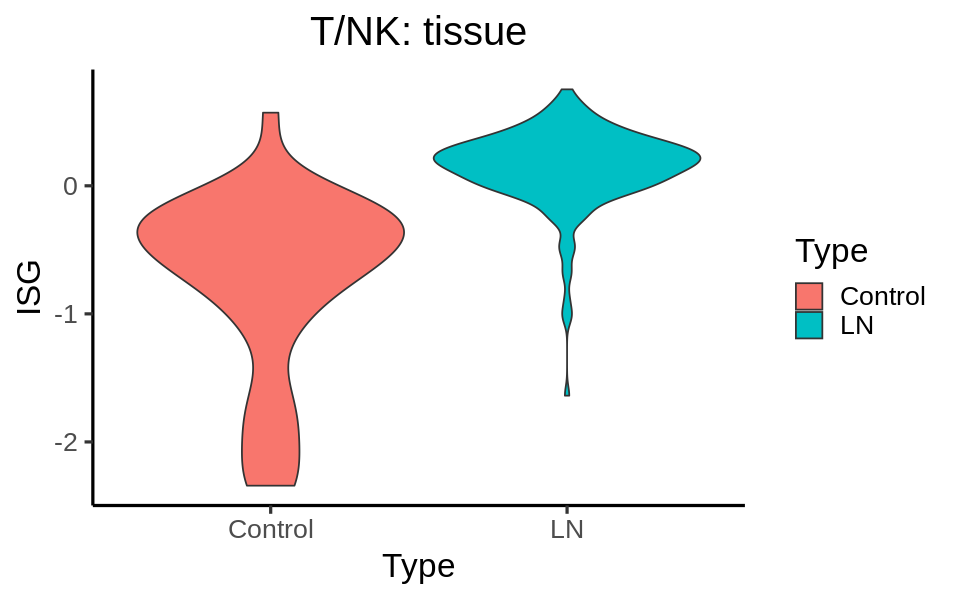

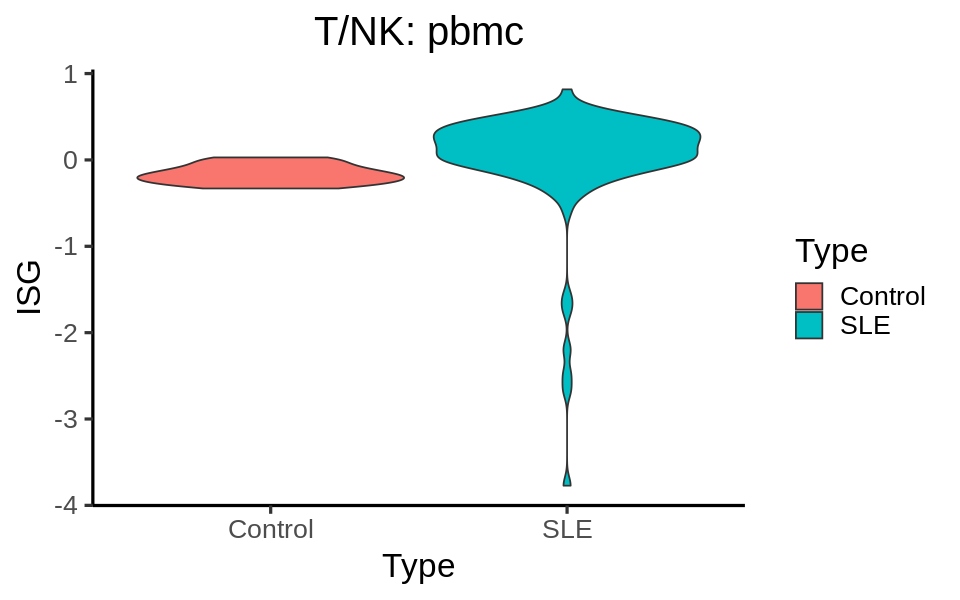

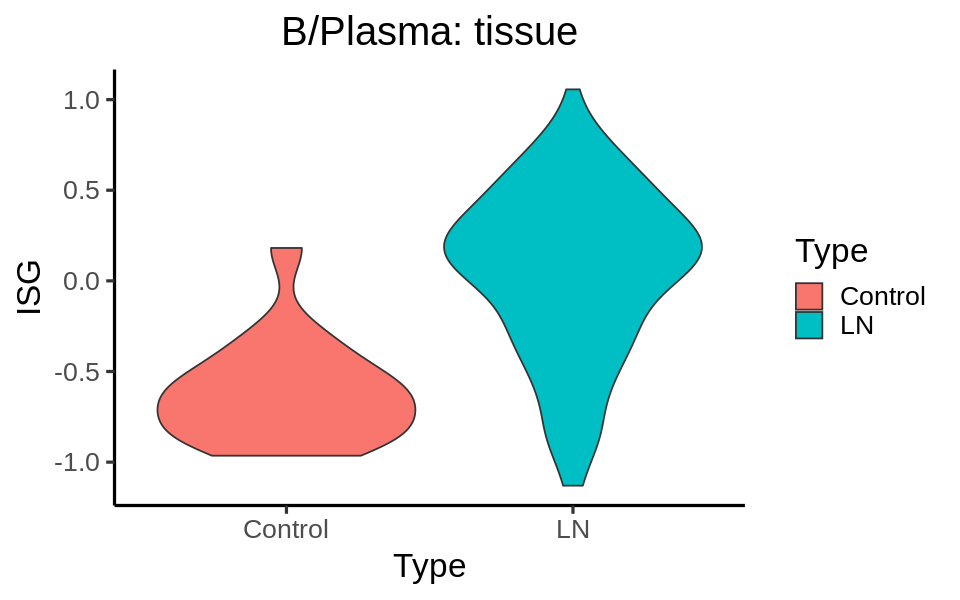

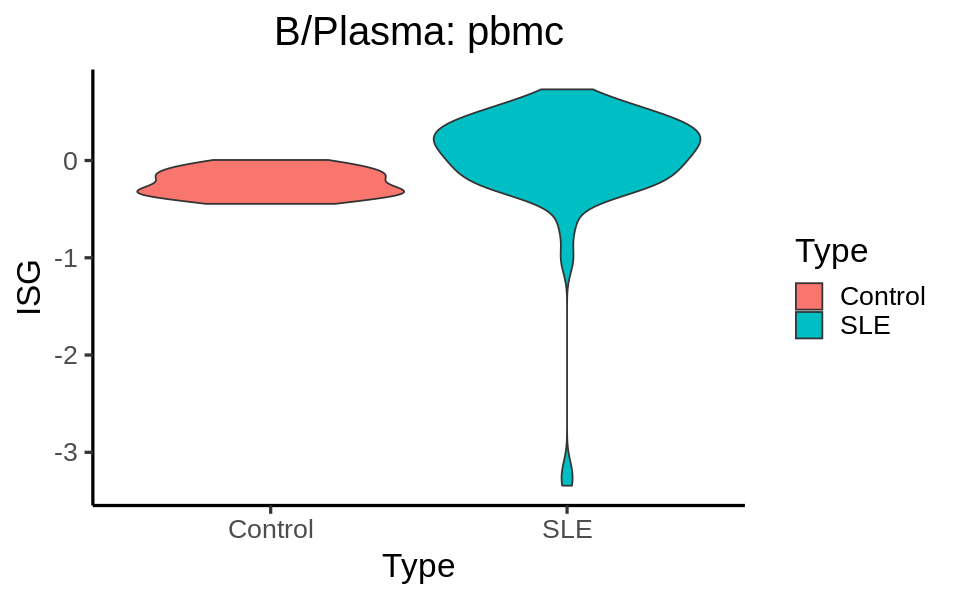

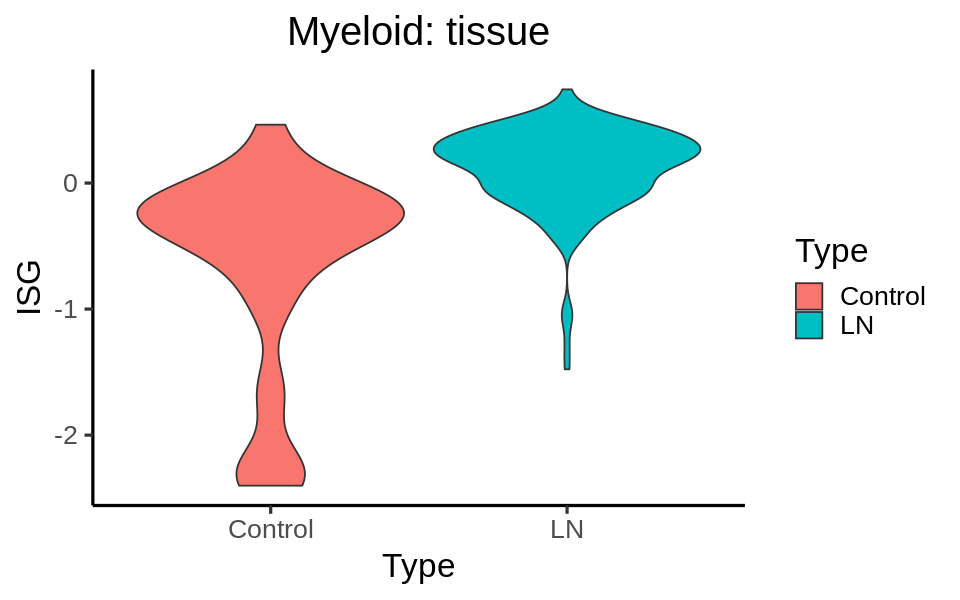

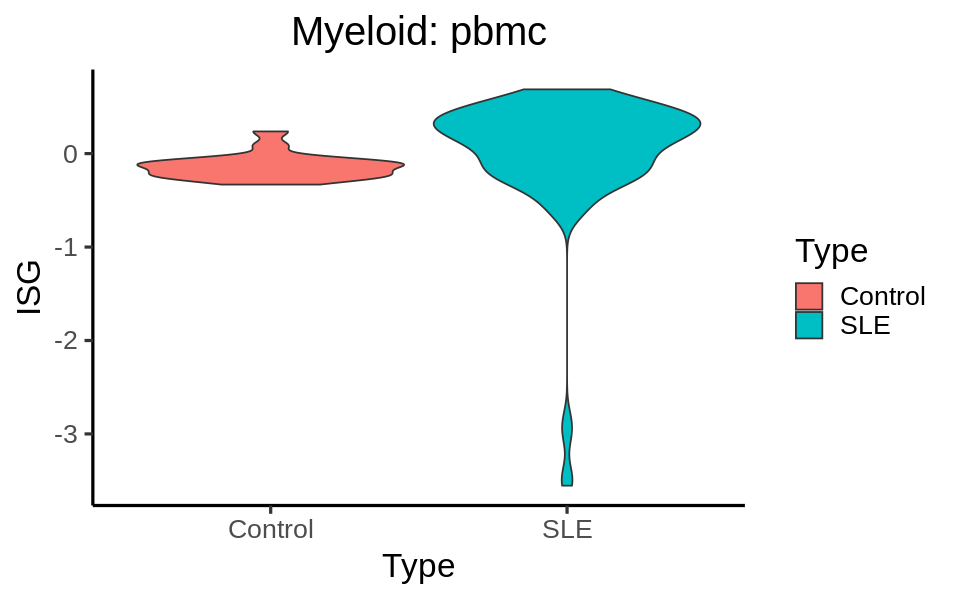

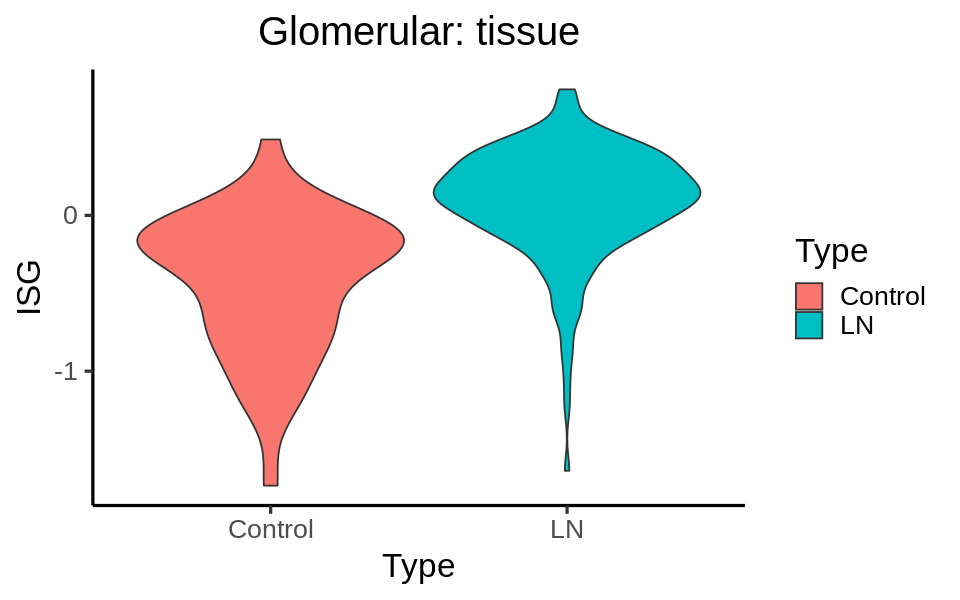

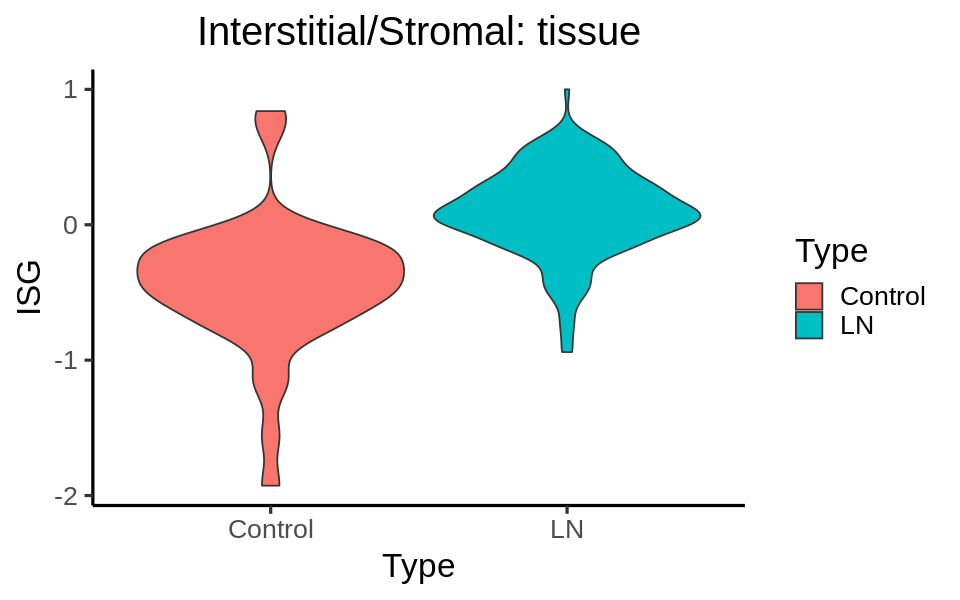

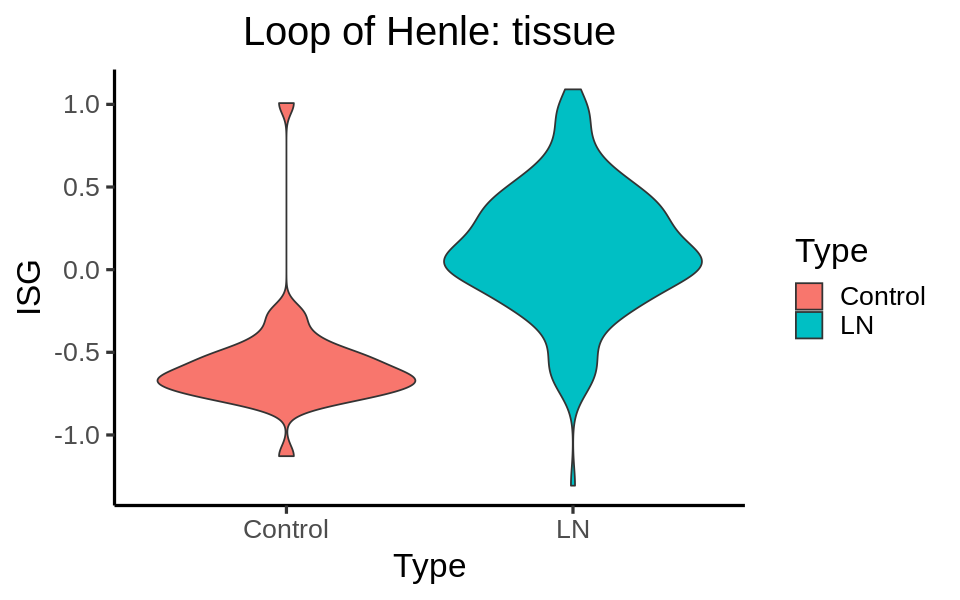

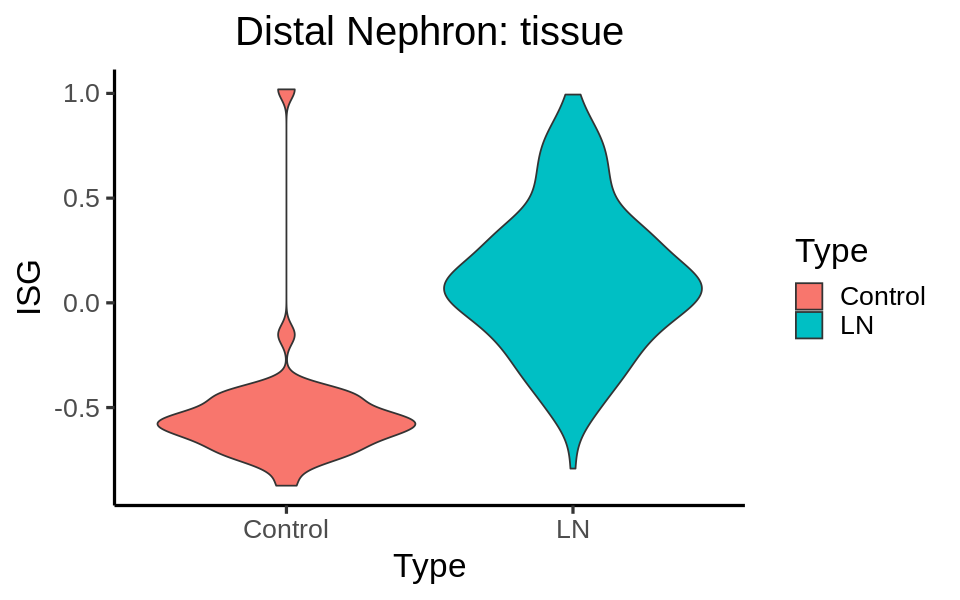

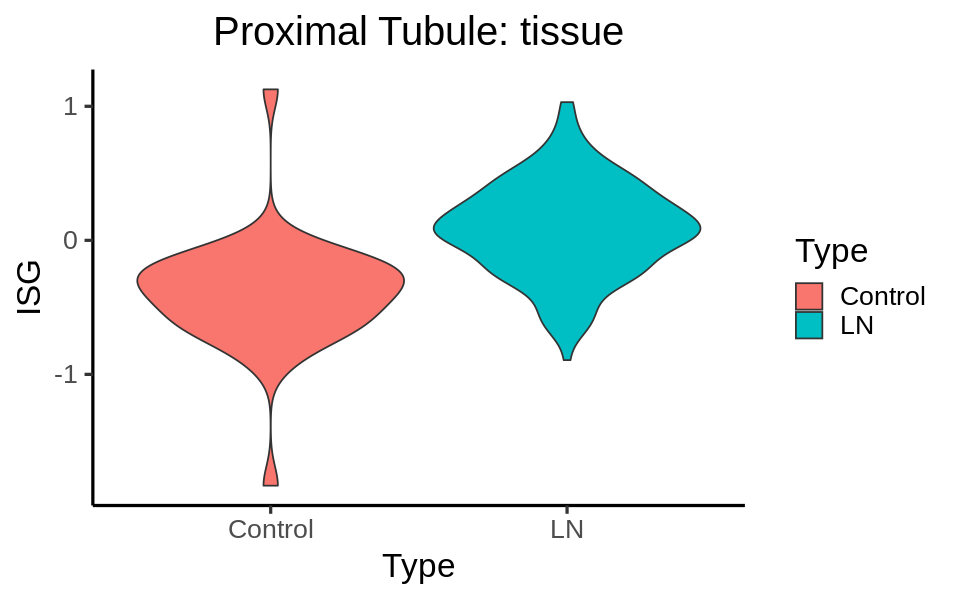

In [128]:
for (ctype in celltypes){
    if (ctype %in% immune_ctypes){
        tissue_list = c('tissue', 'pbmc')
    } else {
        tissue_list = c('tissue')
    }

    for (tissue in tissue_list){
        qcd_meta_out = meta_all[[ctype]][[tissue]]
        if (tissue == 'pbmc'){
            qcd_meta_out = qcd_meta_out #%>% mutate(sample = individual)
        }
        sample_meta = qcd_meta_out

        fig.size(5, 8)
        p = ggplot(sample_meta) +
            geom_violin(aes(x = Type, y = ISG, fill = Type), scale = 'width')+
            ggtitle(paste0(ctype, ': ', tissue))+
            theme_classic(base_size = 20)+
            theme(plot.title = element_text(hjust =0.5))
        print(p)
    }
}